In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import sklearn

In [3]:
student_data = pd.read_csv("~/Desktop/DA485 - Capstone/Portugal_Student_Data.csv", sep = ";")
print(student_data.head)


<bound method NDFrame.head of       Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                

In [4]:
print("Data Types:", "\n", student_data.dtypes)

Data Types: 
 Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64


In [5]:
print(student_data.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

In [6]:
student_data['GDP'] = student_data['GDP'] / 100
print(student_data['GDP'].head())

student_data['Inflation rate'] = student_data['Inflation rate'] / 100
print(student_data['Inflation rate'].head())

student_data['Unemployment rate'] = student_data['Unemployment rate'] / 100
print(student_data['Unemployment rate'].head())

0    0.0174
1    0.0079
2    0.0174
3   -0.0312
4    0.0079
Name: GDP, dtype: float64
0    0.014
1   -0.003
2    0.014
3   -0.008
4   -0.003
Name: Inflation rate, dtype: float64
0    0.108
1    0.139
2    0.108
3    0.094
4    0.139
Name: Unemployment rate, dtype: float64


In [7]:
# Adding interaction terms
student_data['Grade_interaction_sem'] = student_data['Curricular units 1st sem (grade)'] * student_data['Curricular units 2nd sem (grade)']

0        0.000000
1       13.833333
2        0.000000
3       12.914286
4       12.666667
          ...    
4419    13.133333
4420    11.500000
4421    14.206250
4422    12.900000
4423    12.333333
Name: Average Sem Grade, Length: 4424, dtype: float64


(array([ 676.,    0.,   61.,  167.,    8.,  186., 1725., 1340.,  244.,
          17.]),
 array([ 0.        ,  1.82836538,  3.65673077,  5.48509615,  7.31346154,
         9.14182692, 10.97019231, 12.79855769, 14.62692308, 16.45528846,
        18.28365385]),
 <BarContainer object of 10 artists>)

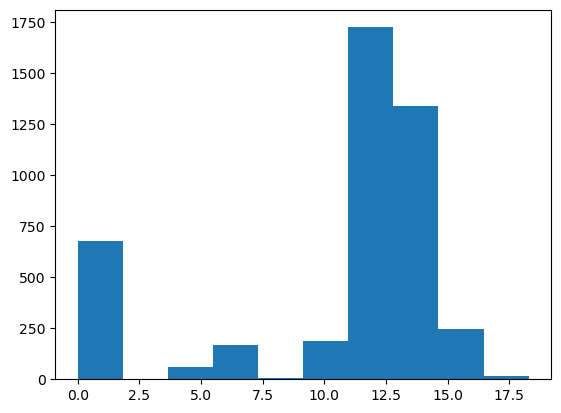

In [8]:
student_data['Average Sem Grade'] = (student_data['Curricular units 1st sem (grade)'] + student_data['Curricular units 2nd sem (grade)'])/2
print(student_data['Average Sem Grade'])
plt.hist(student_data['Average Sem Grade'])

In [9]:
student_data.drop(columns=['Nacionality'])

Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Mother's qualification  \
0                              122.0                      19   
1                              160.0                       1   
2                              122.0                      37   
3                              122.0                      38   
4                              100.0                      37   
...                              ...                     ...   
4419                           125.0                       1   
4420                           120.0                       1   
4421                           154.0                      37   
4422                           180.0                      37   
4423                           152.0                      38   

      Father's qualification  Mother's occupation  ...  \
0                         12                    5  ...   
1                          3                    3  ...   
2                         37                    9  ...   
3                         37                    5  ...   
4                         38                    9  ...   
...                      ...                  ...  ...   
4419                       1                    5  ...   
4420                       1                    9  ...   
4421                      37                    9  ...   
4422                      37                    7  ...   
4423                      37                    5  ...   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                         10   
4                                          6   
...                                      ...   
4419                                       8   
4420                                       6   
4421                                       9   
4422                                       6   
4423                                       6   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                       0                          0.000000   
1                                       6                         13.666667   
2                                       0                          0.000000   
3                                       5                         12.4000

/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


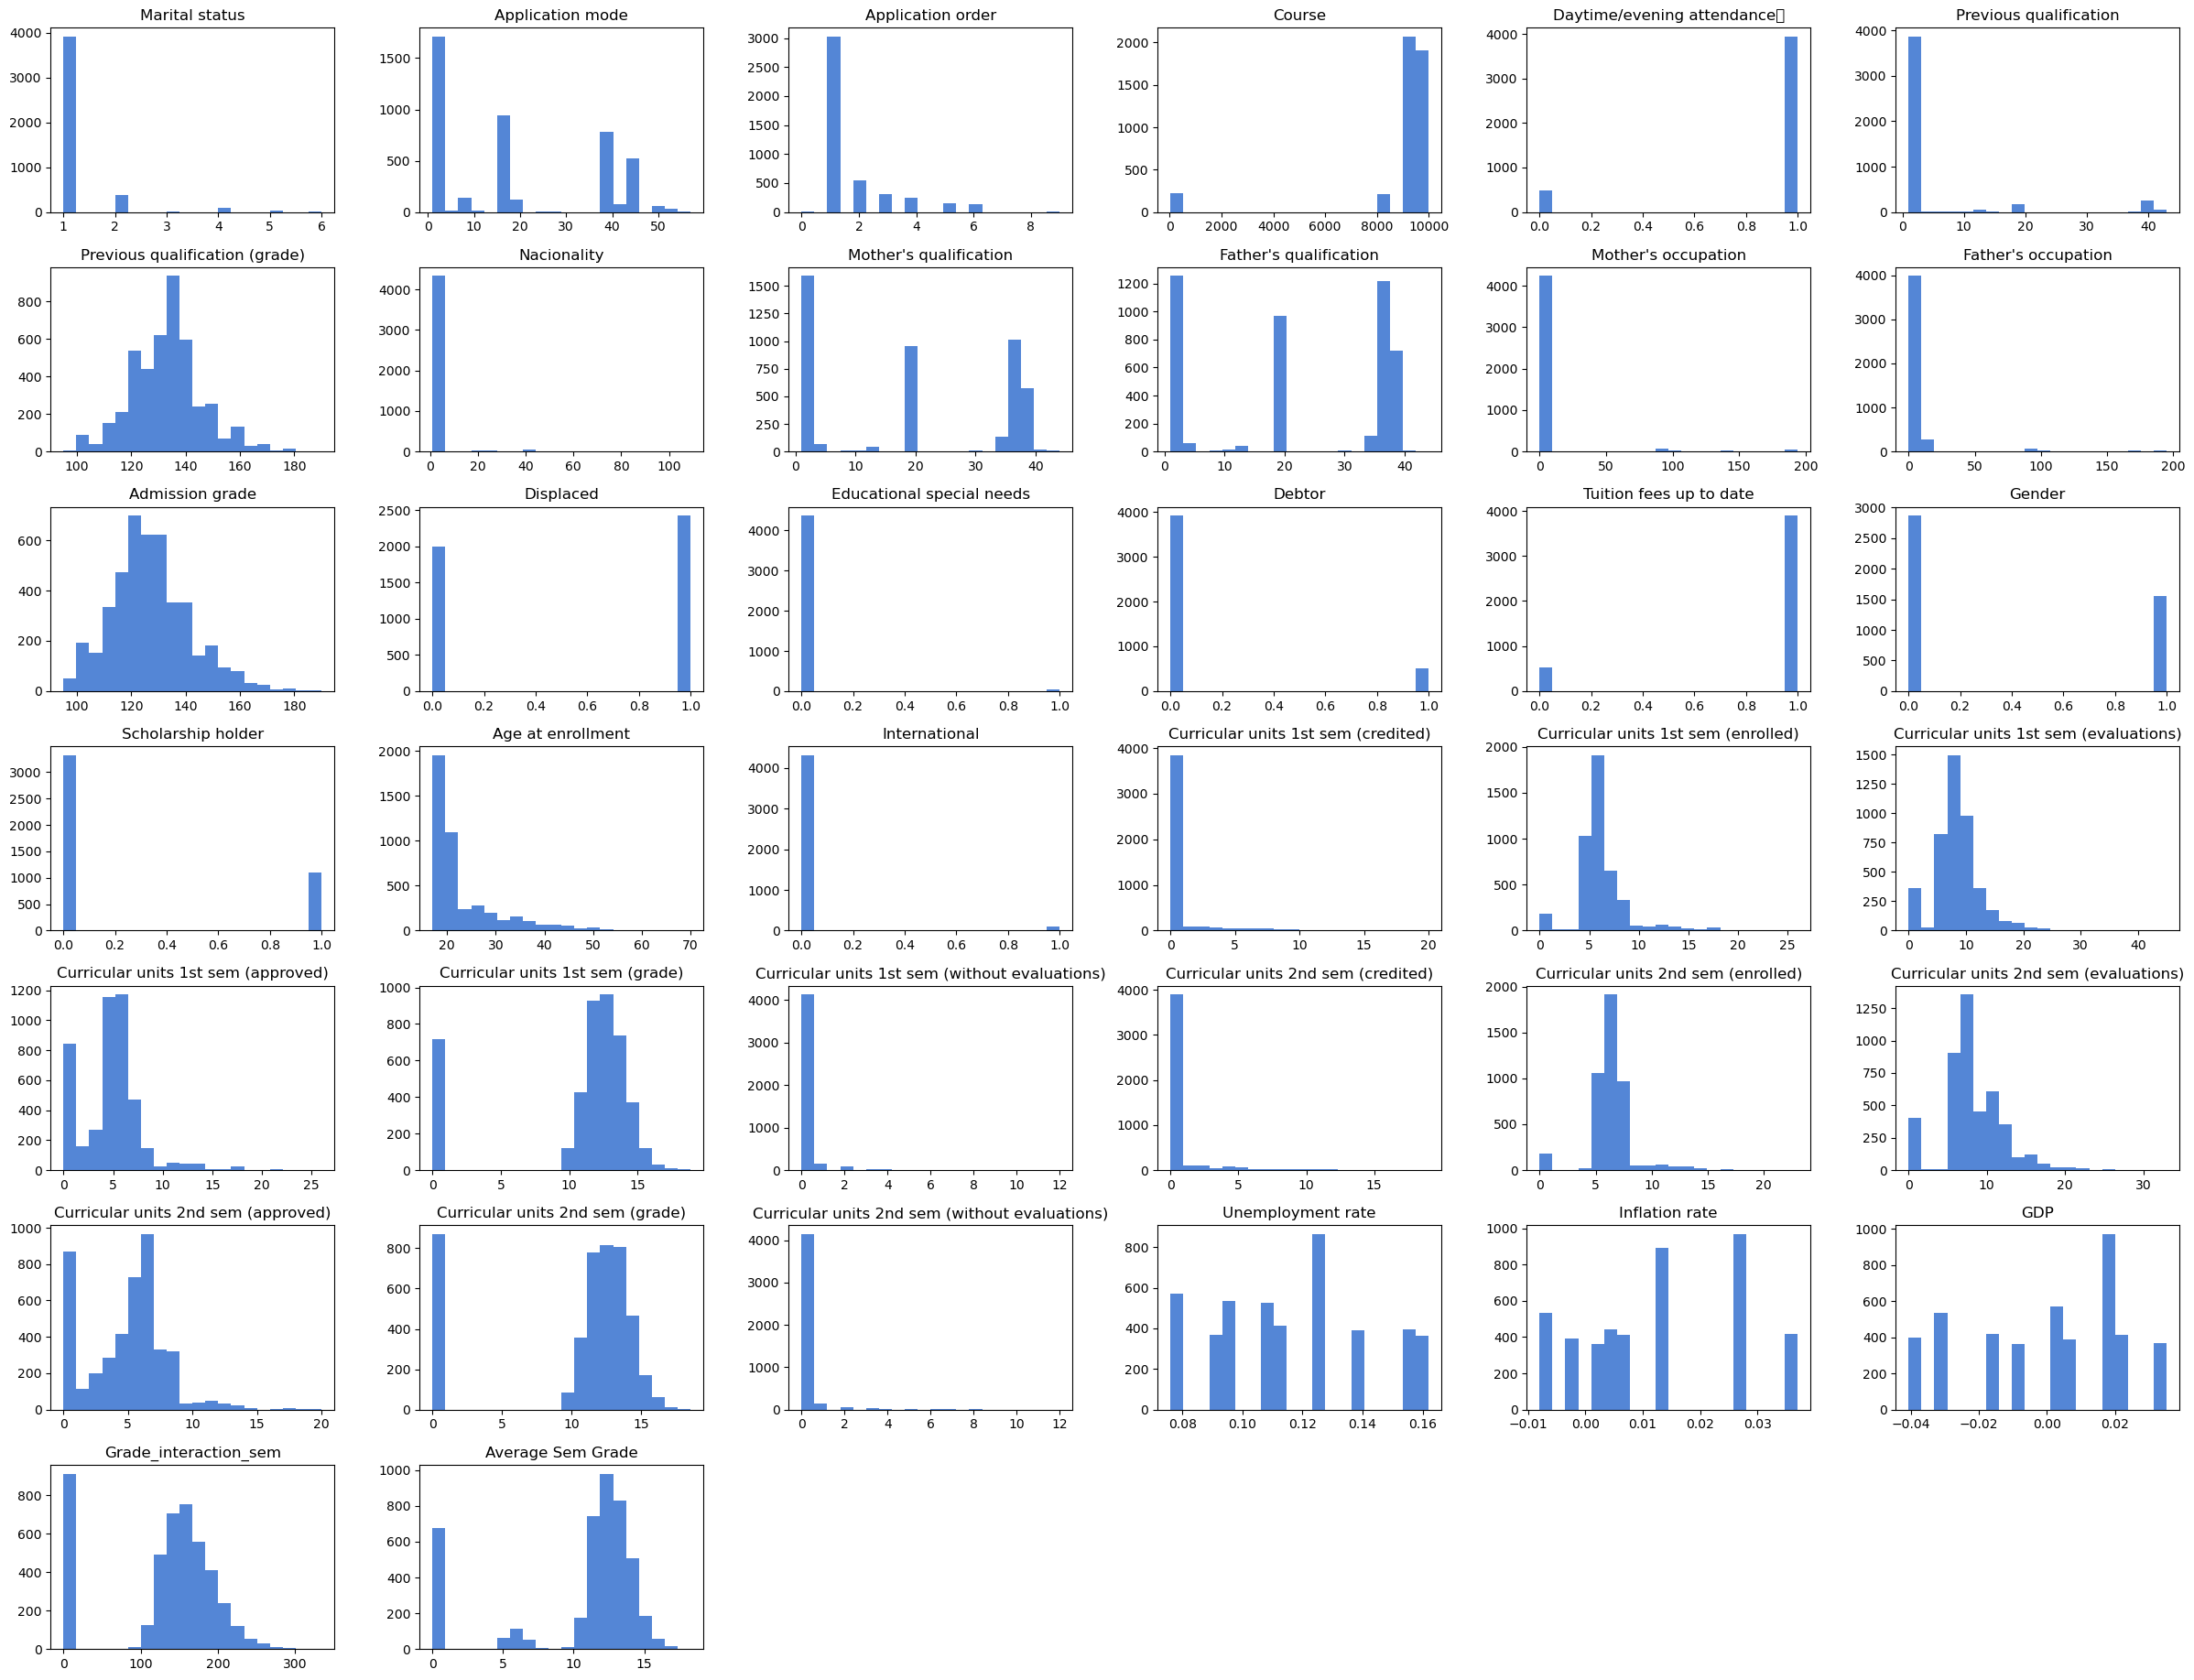

<function matplotlib.pyplot.show(close=None, block=None)>

In [10]:
student_data[student_data.columns].hist(bins= 20, figsize=(30,23), color='#5486d6')
for ax in plt.gcf().get_axes():
    ax.grid(False)

plt.show()
plt.show

In [11]:
from scipy.stats import shapiro
stat, p = shapiro(student_data['Age at enrollment'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.707, p=0.000
Sample does not look Gaussian (reject H0)


In [12]:
continuous_data = student_data[['Previous qualification (grade)', 'Age at enrollment', 
                                'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)',
                                'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 
                                'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)',
                                'Unemployment rate', 'Inflation rate', 'GDP', 'Grade_interaction_sem', 'Average Sem Grade']]
print(continuous_data)

      Previous qualification (grade)  Age at enrollment  Admission grade  \
0                              122.0                 20            127.3   
1                              160.0                 19            142.5   
2                              122.0                 19            124.8   
3                              122.0                 20            119.6   
4                              100.0                 45            141.5   
...                              ...                ...              ...   
4419                           125.0                 19            122.2   
4420                           120.0                 18            119.0   
4421                           154.0                 30            149.5   
4422                           180.0                 20            153.8   
4423                           152.0                 22            152.0   

      Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0          

In [13]:
from scipy import stats
def shapiro_test_multiple(data):
    results = []
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            shapiro_result = stats.shapiro(data[column].dropna())
            results.append({
                'Variable': column,
                'Statistic': shapiro_result.statistic,
                'P-value': shapiro_result.pvalue,
                'Reject Null': shapiro_result.pvalue < alpha
            })
    return pd.DataFrame(results)

# Example usage with a Pandas DataFrame
data = continuous_data
shapiro_results = shapiro_test_multiple(data)
print(shapiro_results)

                                  Variable  Statistic       P-value  \
0           Previous qualification (grade)   0.979897  1.443189e-24   
1                        Age at enrollment   0.707169  2.421442e-66   
2                          Admission grade   0.980482  3.176984e-24   
3         Curricular units 1st sem (grade)   0.684601  8.402219e-68   
4         Curricular units 2nd sem (grade)   0.704320  1.565443e-66   
5      Curricular units 1st sem (approved)   0.885822  3.065710e-49   
6      Curricular units 2nd sem (approved)   0.918235  8.330056e-44   
7      Curricular units 1st sem (enrolled)   0.730027  9.188823e-65   
8      Curricular units 2nd sem (enrolled)   0.785451  2.101086e-60   
9   Curricular units 1st sem (evaluations)   0.902764  1.385502e-46   
10  Curricular units 2nd sem (evaluations)   0.932363  7.264400e-41   
11                       Unemployment rate   0.934738  2.530875e-40   
12                          Inflation rate   0.923822  1.071902e-42   
13    

In [14]:
# Taking the log of age at enrollment
student_data['Age at enrollment'] = np.log(student_data['Age at enrollment'])

In [15]:
student_data.columns = student_data.columns.str.replace("'", "")
print(student_data)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


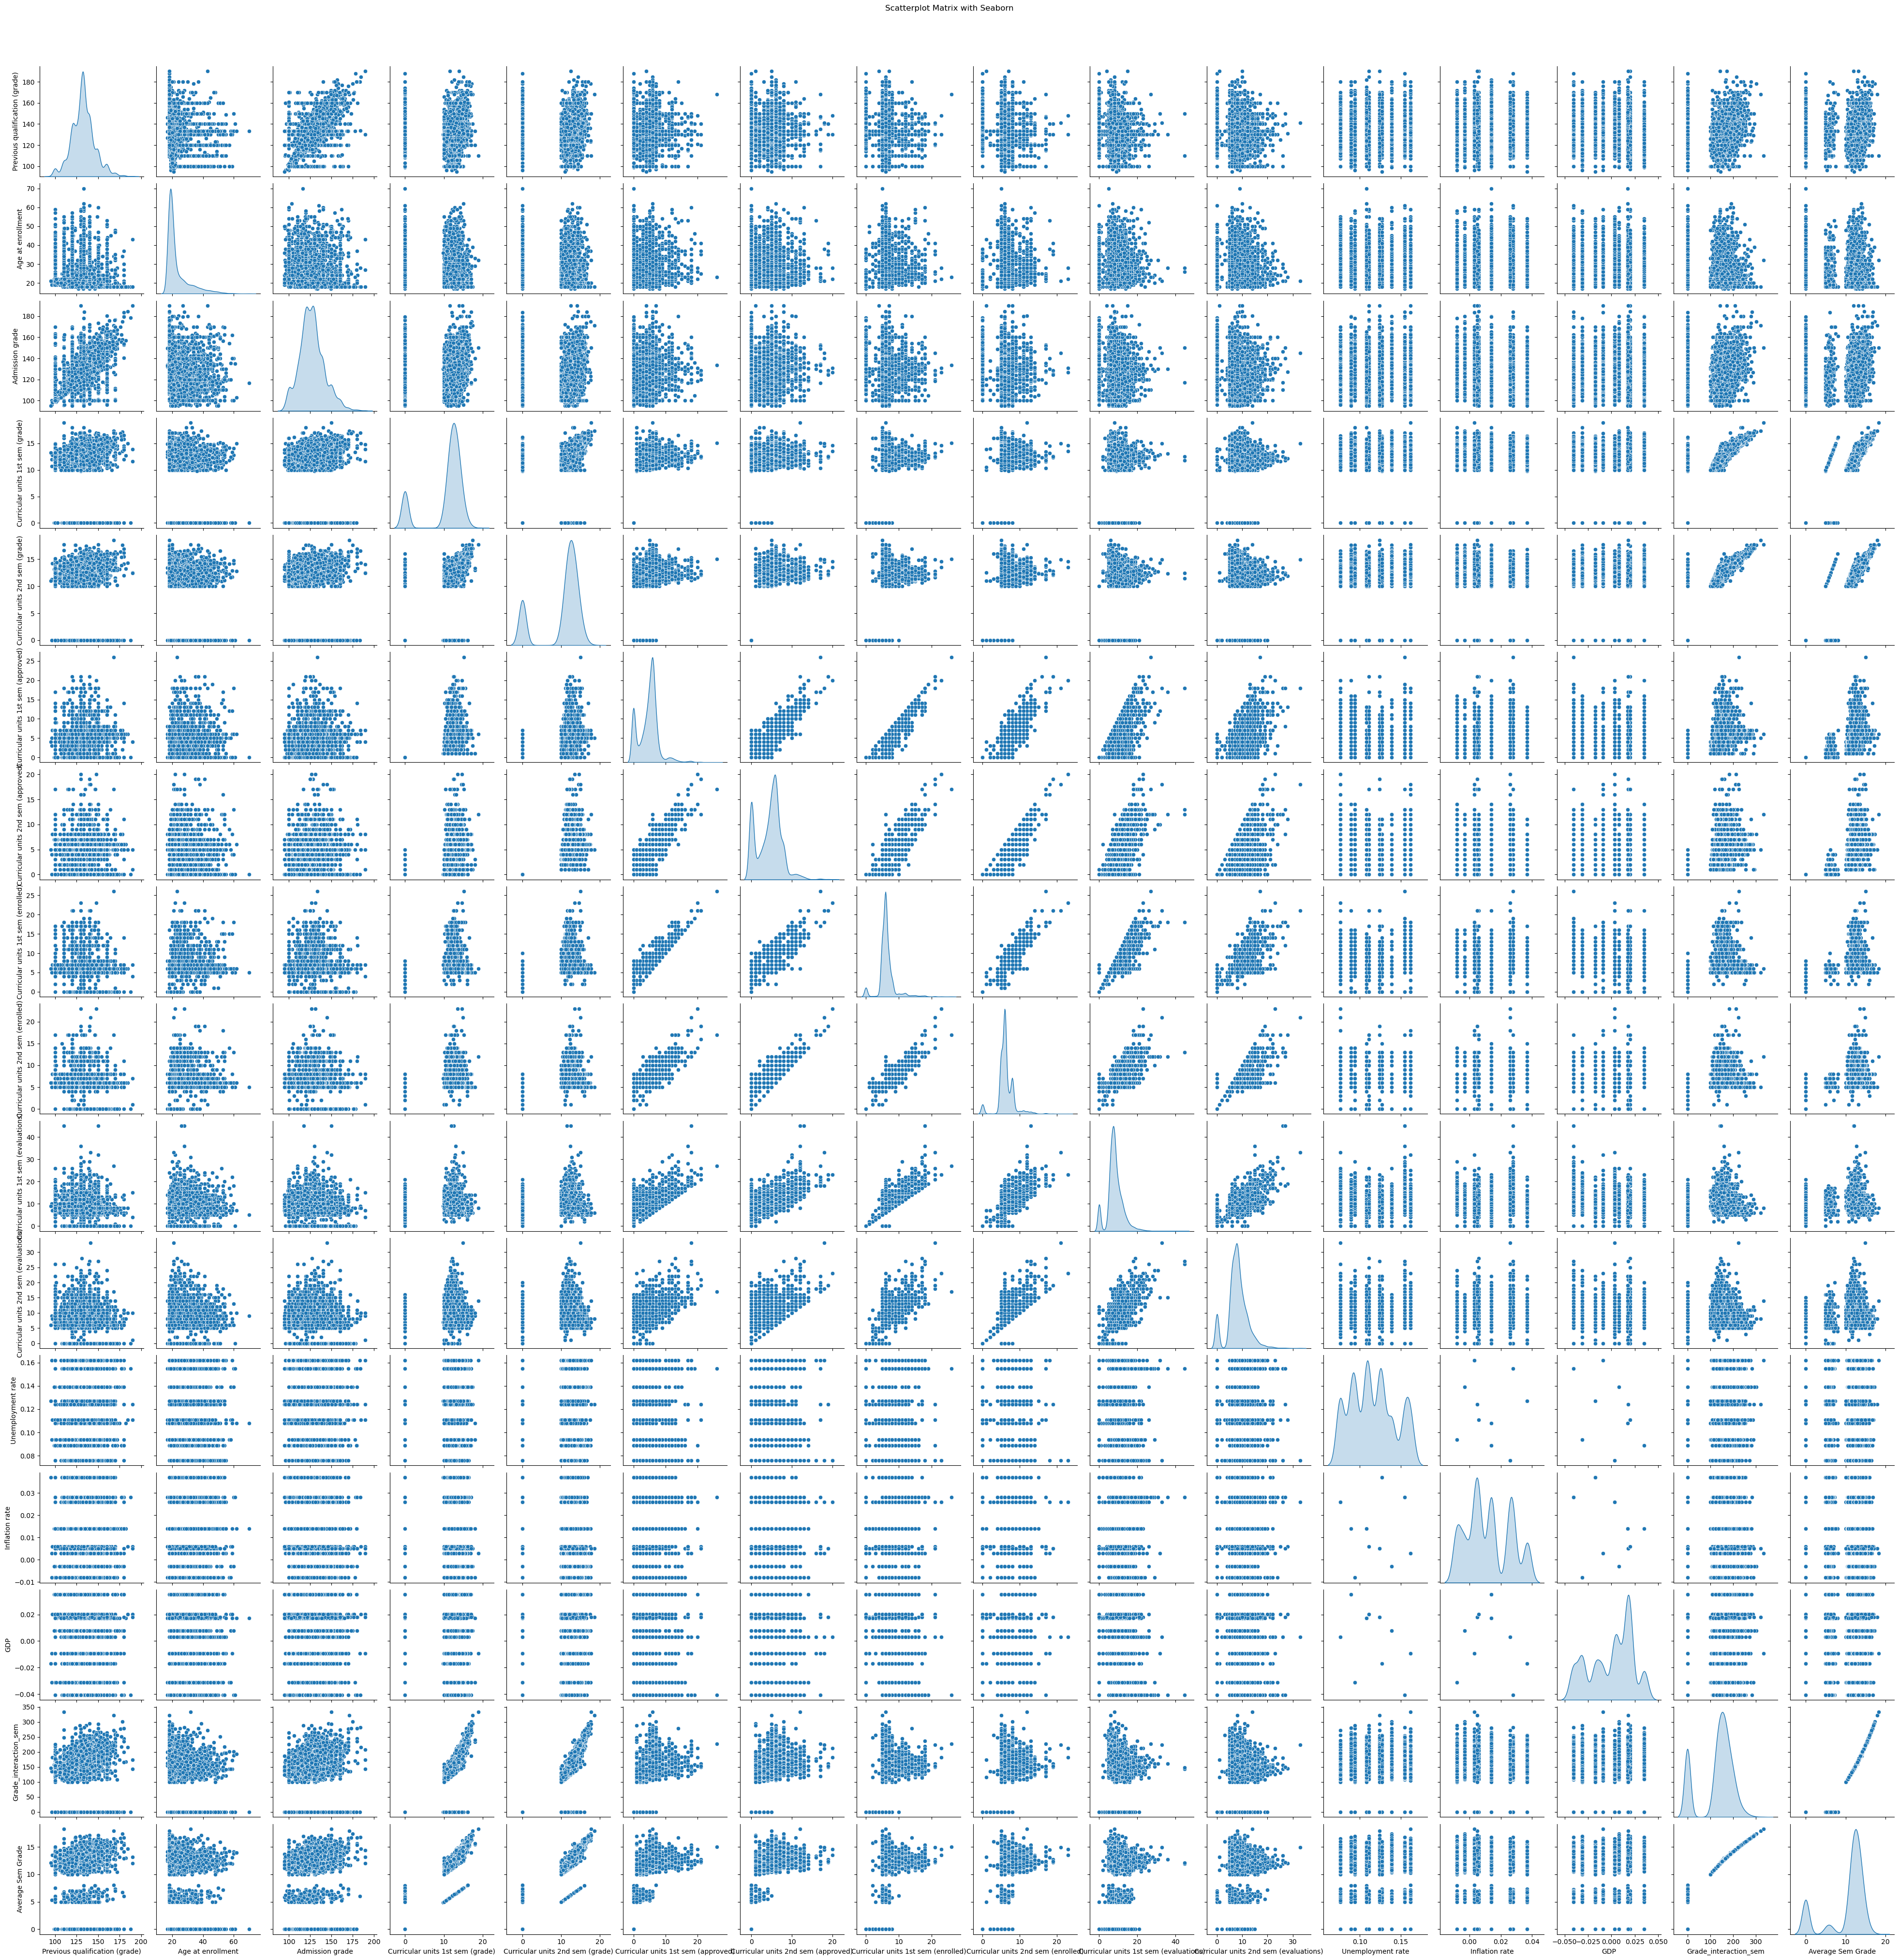

In [16]:
import seaborn as sns
sns.pairplot(continuous_data, diag_kind='kde')
plt.suptitle('Scatterplot Matrix with Seaborn', y=1.02)
plt.show()

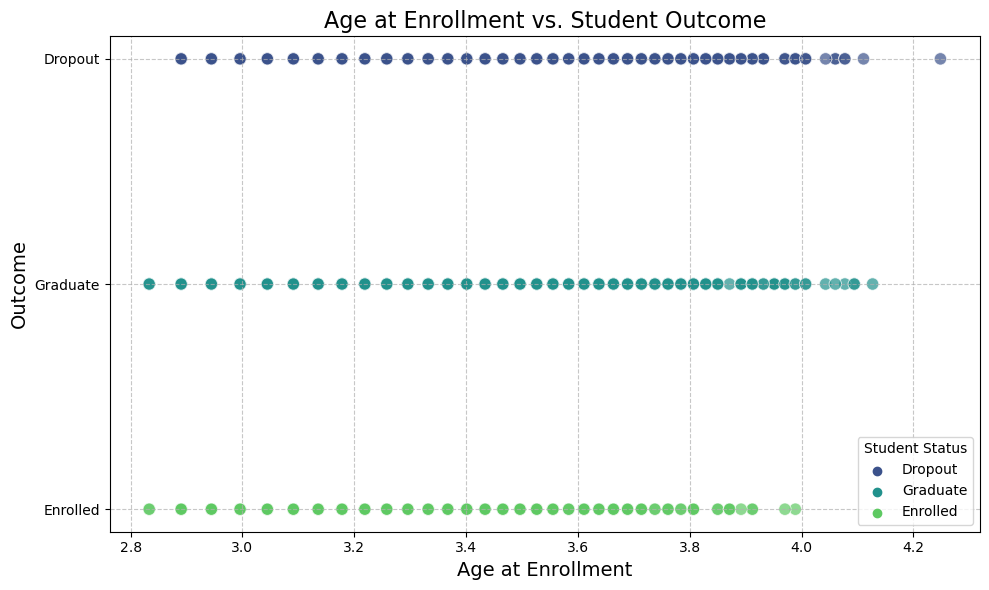

In [17]:
plt.figure(figsize=(10, 6))

# Method 1: Using Seaborn (recommended for categorical targets)
sns.scatterplot(
    data=student_data,
    x='Age at enrollment',
    y='Target',
    hue='Target',  # Color by target
    palette='viridis',  # Color palette
    s=80,  # Point size
    alpha=0.7  # Transparency
)

plt.title('Age at Enrollment vs. Student Outcome', fontsize=16)
plt.xlabel('Age at Enrollment', fontsize=14)
plt.ylabel('Outcome', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Student Status')
plt.tight_layout()
plt.show()

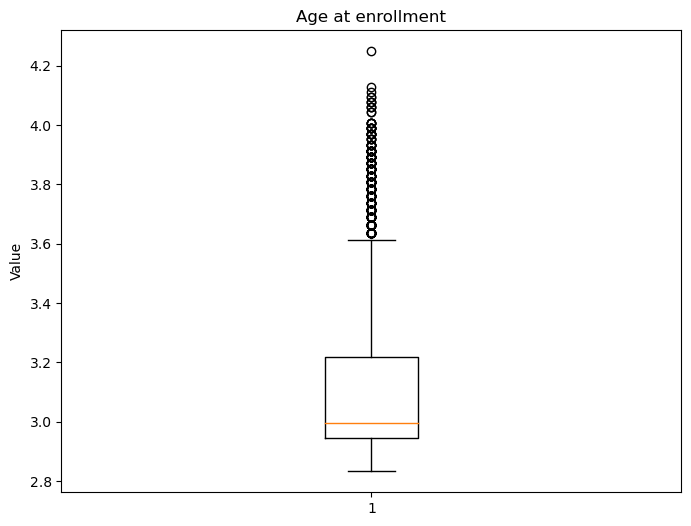

In [18]:
# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(student_data['Age at enrollment'])
plt.title('Age at enrollment')
plt.ylabel('Value')
plt.show()

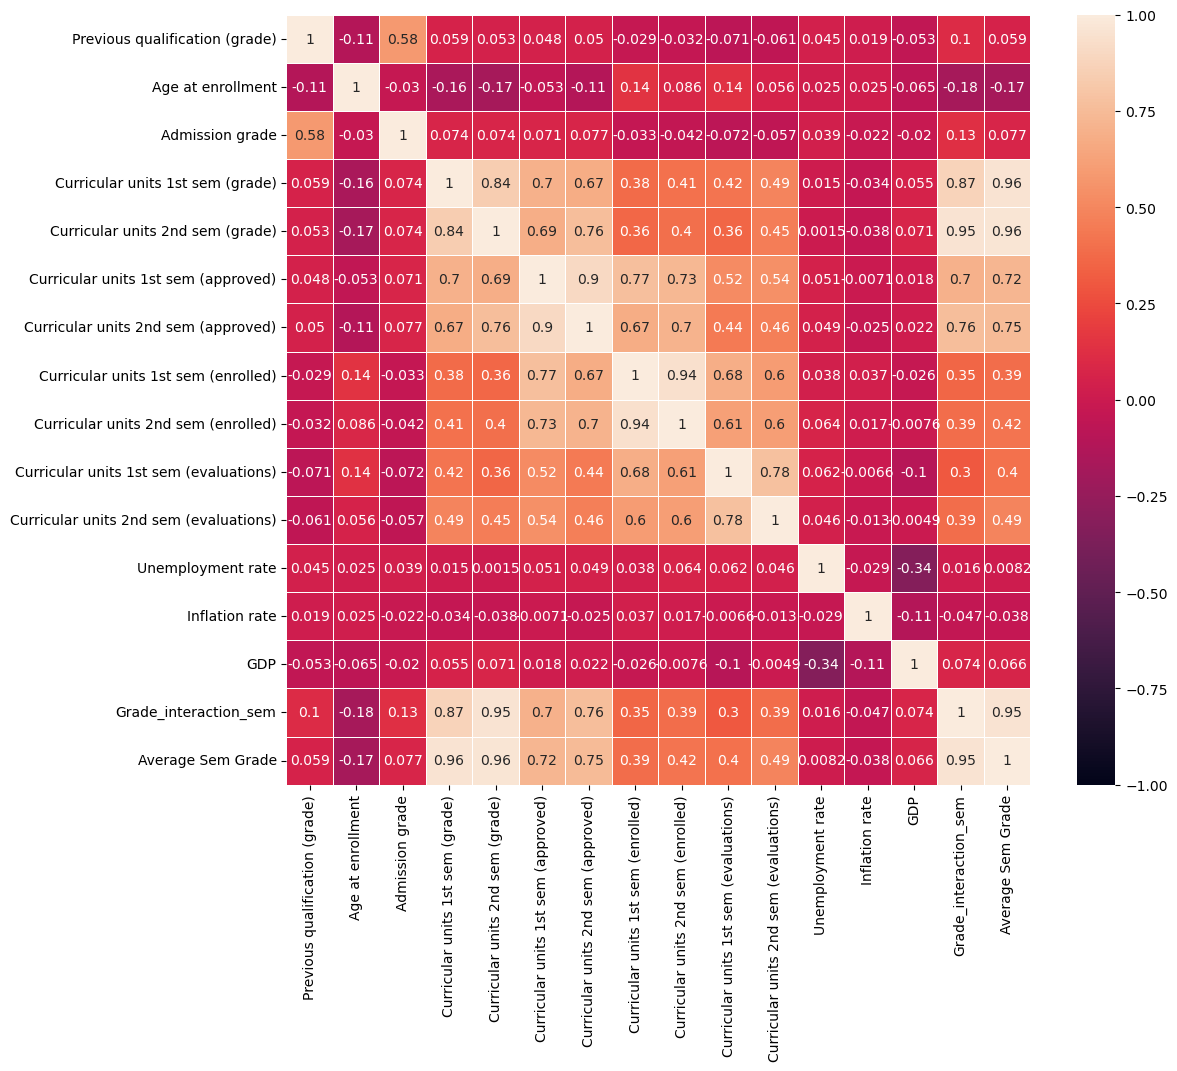

In [20]:
plt.figure(figsize=(12, 10))
correlations = continuous_data.corr()
sns.heatmap(correlations, annot=True, vmin=-1, vmax=1, linewidth=.5)
plt.show()


In [21]:
df_group_by_type = student_data.groupby('Target')['Curricular units 1st sem (grade)'].apply(np.mean)
df_group_by_type

Target
Dropout      7.256656
Enrolled    11.125257
Graduate    12.643655
Name: Curricular units 1st sem (grade), dtype: float64

In [115]:
from scipy import stats
group1 = student_data[student_data['Target'] == 'Dropout']['Curricular units 1st sem (grade)']
group2 = student_data[student_data['Target'] == 'Graduate']['Curricular units 1st sem (grade)']
t_statistic, p_value = stats.ttest_ind(group1, group2, alternative='less')
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -36.66157442800798
p-value: 6.645336697163824e-251


In [22]:
from scipy import stats
group1 = student_data[student_data['Target'] == 'Dropout']['Curricular units 2nd sem (grade)']
group2 = student_data[student_data['Target'] == 'Graduate']['Curricular units 2nd sem (grade)']
t_statistic, p_value = stats.ttest_ind(group1, group2, alternative='less')
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -45.80885206007108
p-value: 0.0


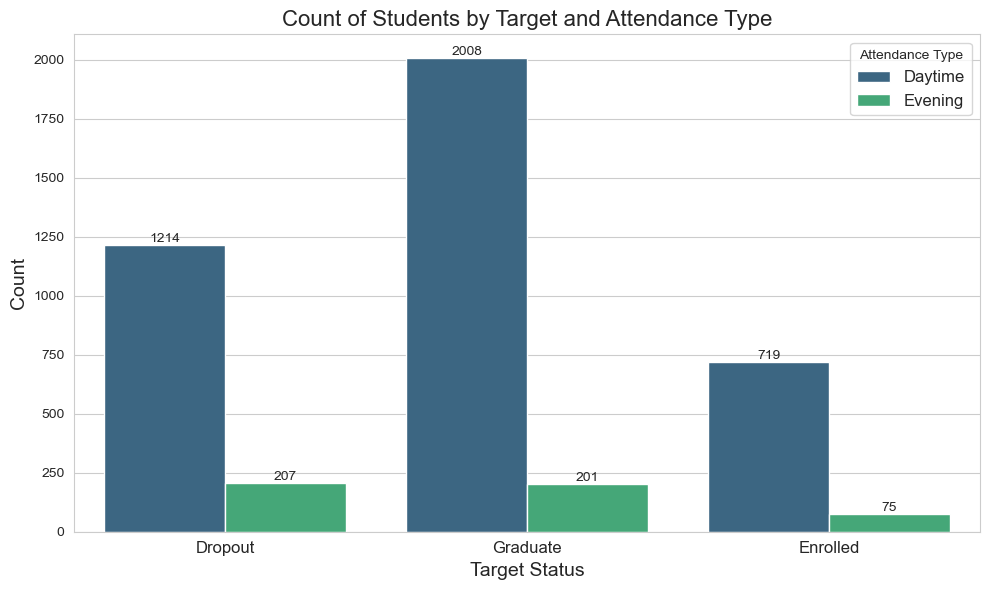

In [23]:
# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the count plot (histogram)
ax = sns.countplot(x='Target', hue='Daytime/evening attendance\t', data=student_data, palette='viridis',
                   hue_order=[1, 0])

# Add labels and title
plt.title('Count of Students by Target and Attendance Type', fontsize=16)
plt.xlabel('Target Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Daytime', 'Evening'], title='Attendance Type', fontsize=12)
# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

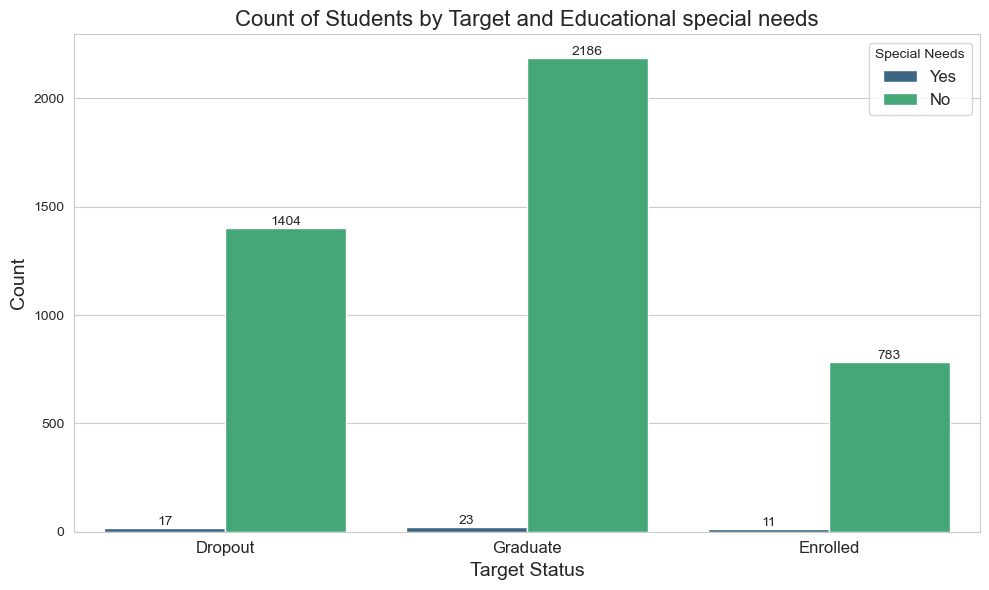

In [24]:
# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the count plot (histogram)
ax = sns.countplot(x='Target', hue='Educational special needs', data=student_data, palette='viridis',
                   hue_order=[1, 0])

# Add labels and title
plt.title('Count of Students by Target and Educational special needs', fontsize=16)
plt.xlabel('Target Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Yes', 'No'], title='Special Needs', fontsize=12)
# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

OUTLIER DETECTION SUMMARY
Total features analyzed: 38
Total outliers found: 12448
Features with outliers: 30

FEATURES WITH MOST OUTLIERS:
----------------------------------------
Scholarship holder: 1099 outliers
Grade_interaction_sem: 940 outliers
Average Sem Grade: 920 outliers
Curricular units 2nd sem (grade): 877 outliers
Curricular units 1st sem (grade): 726 outliers
Previous qualification: 707 outliers
Curricular units 1st sem (credited): 577 outliers
Application order: 541 outliers
Curricular units 2nd sem (credited): 530 outliers
Tuition fees up to date: 528 outliers


/var/folders/gh/v4rcgtfx6dzdn9rmvp4_33l80000gn/T/ipykernel_78811/2846534.py:101: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


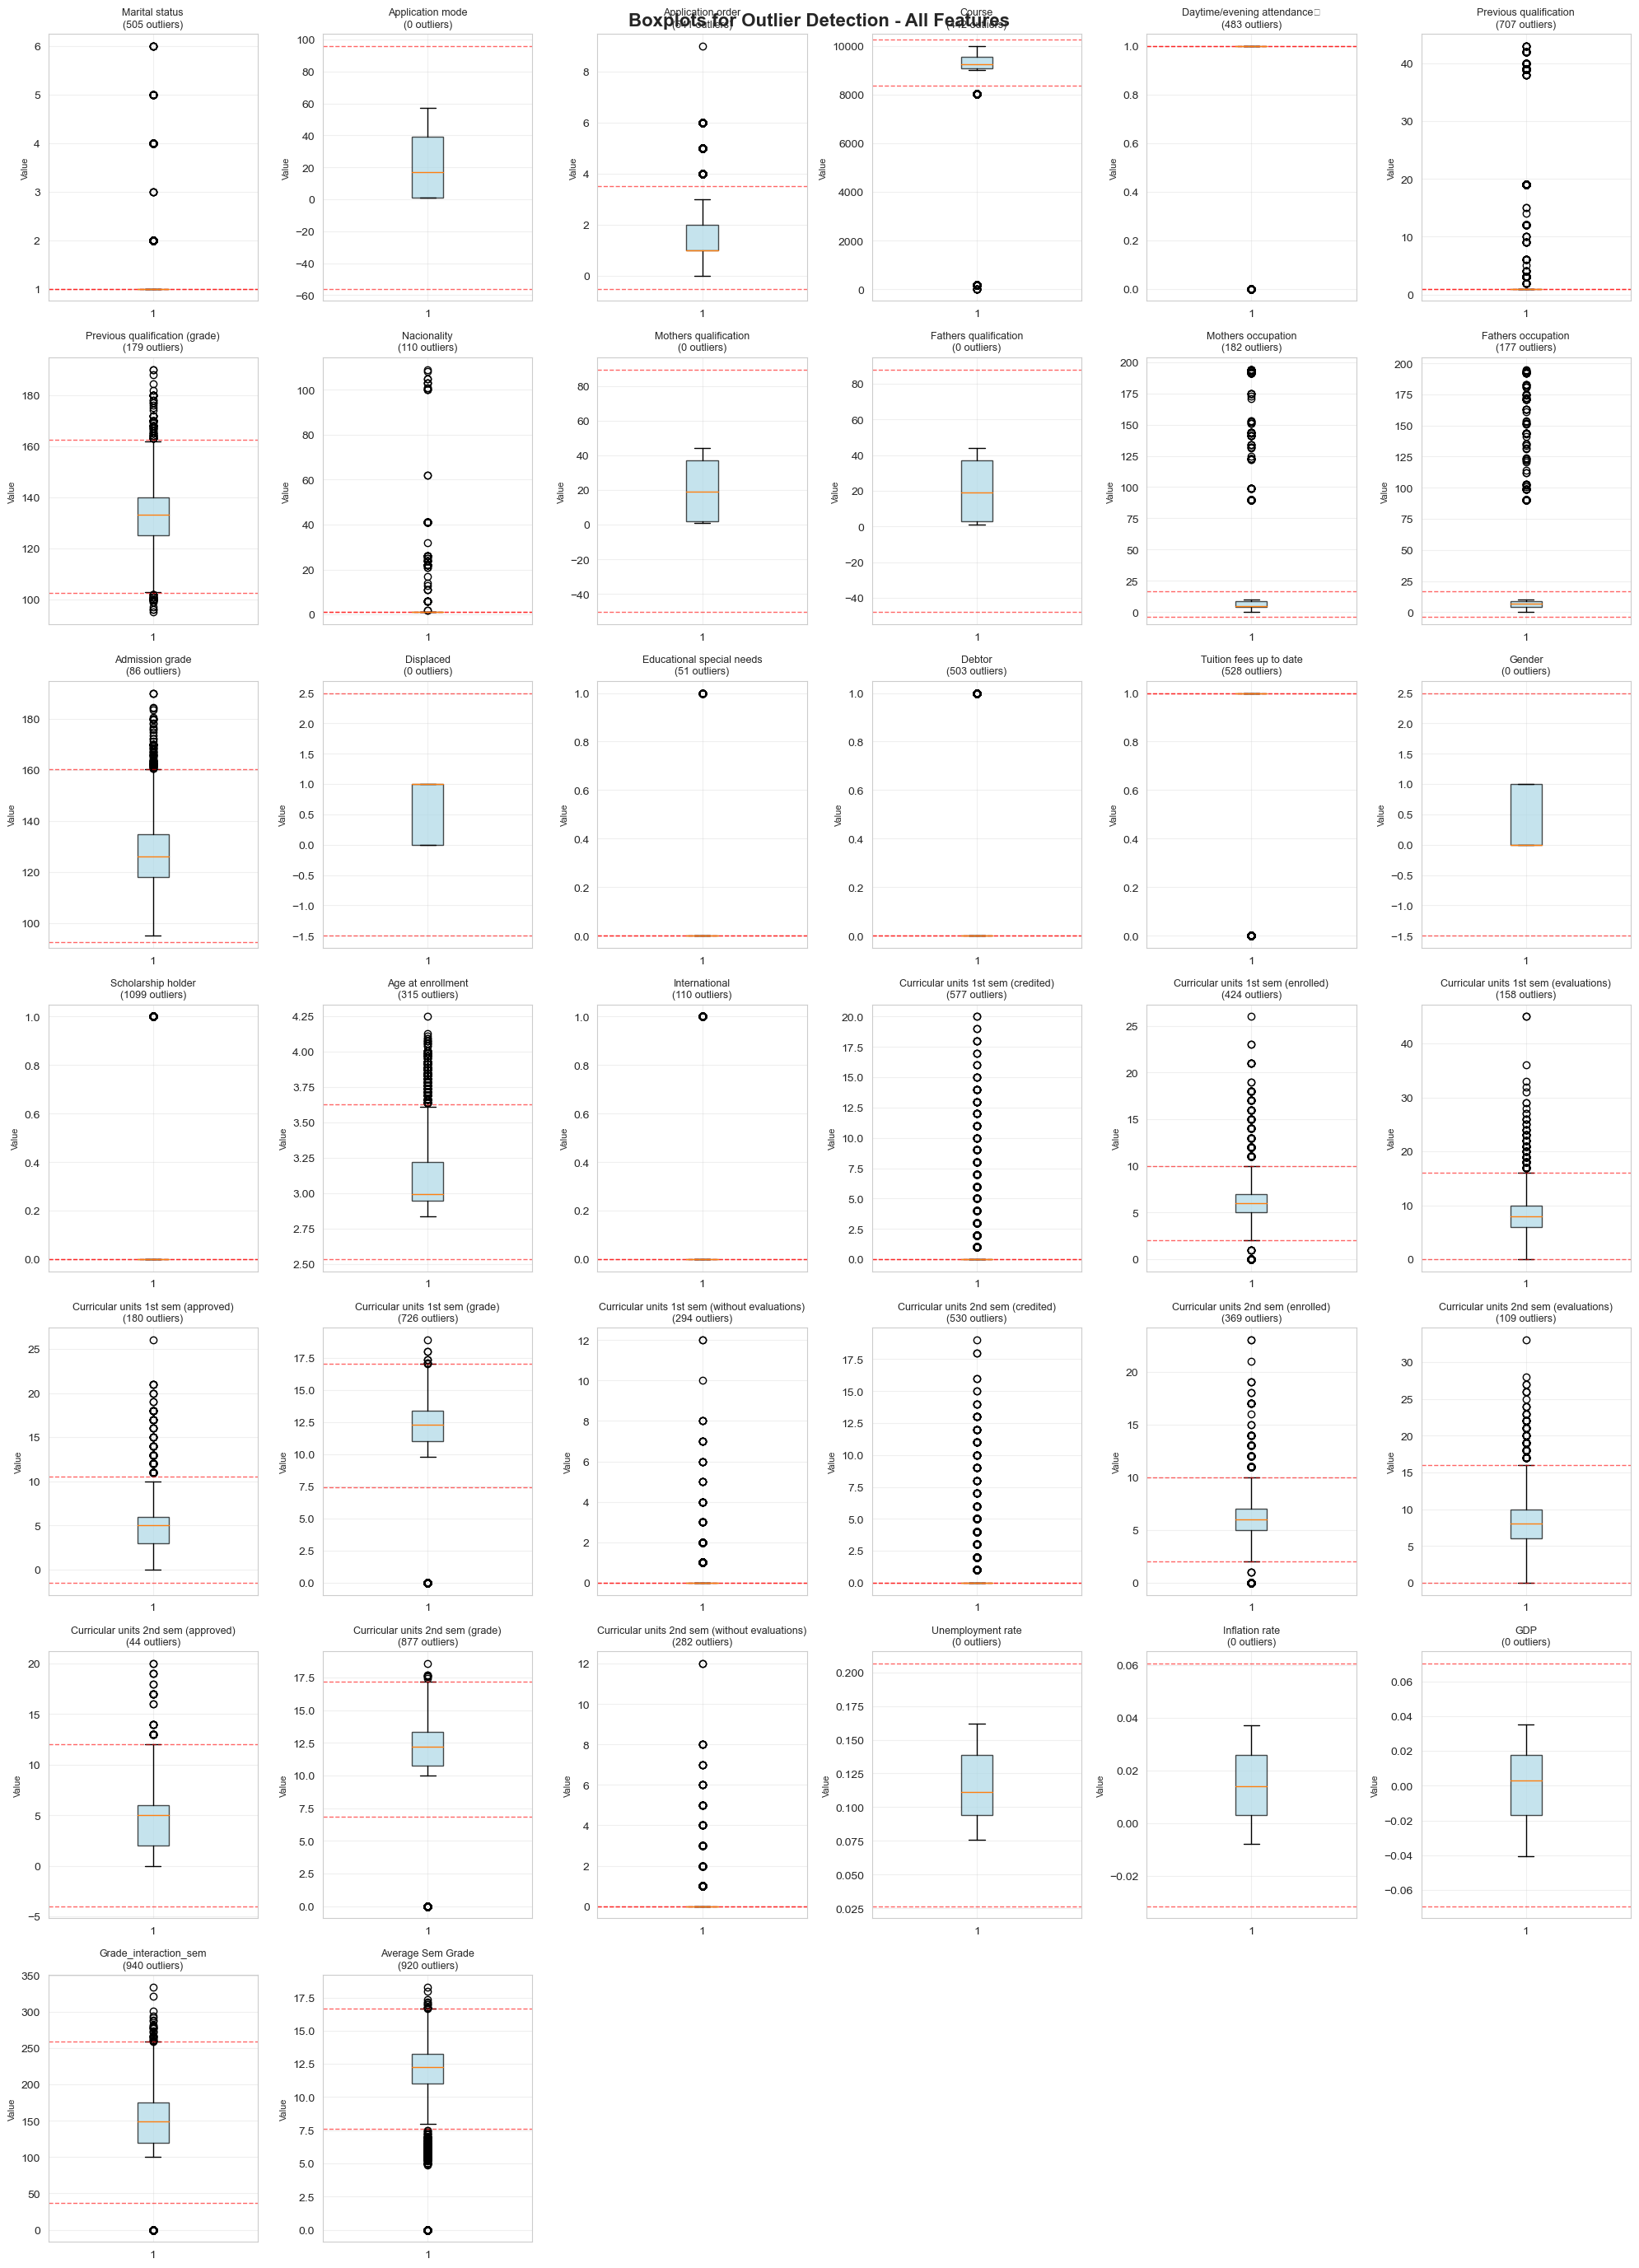

/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


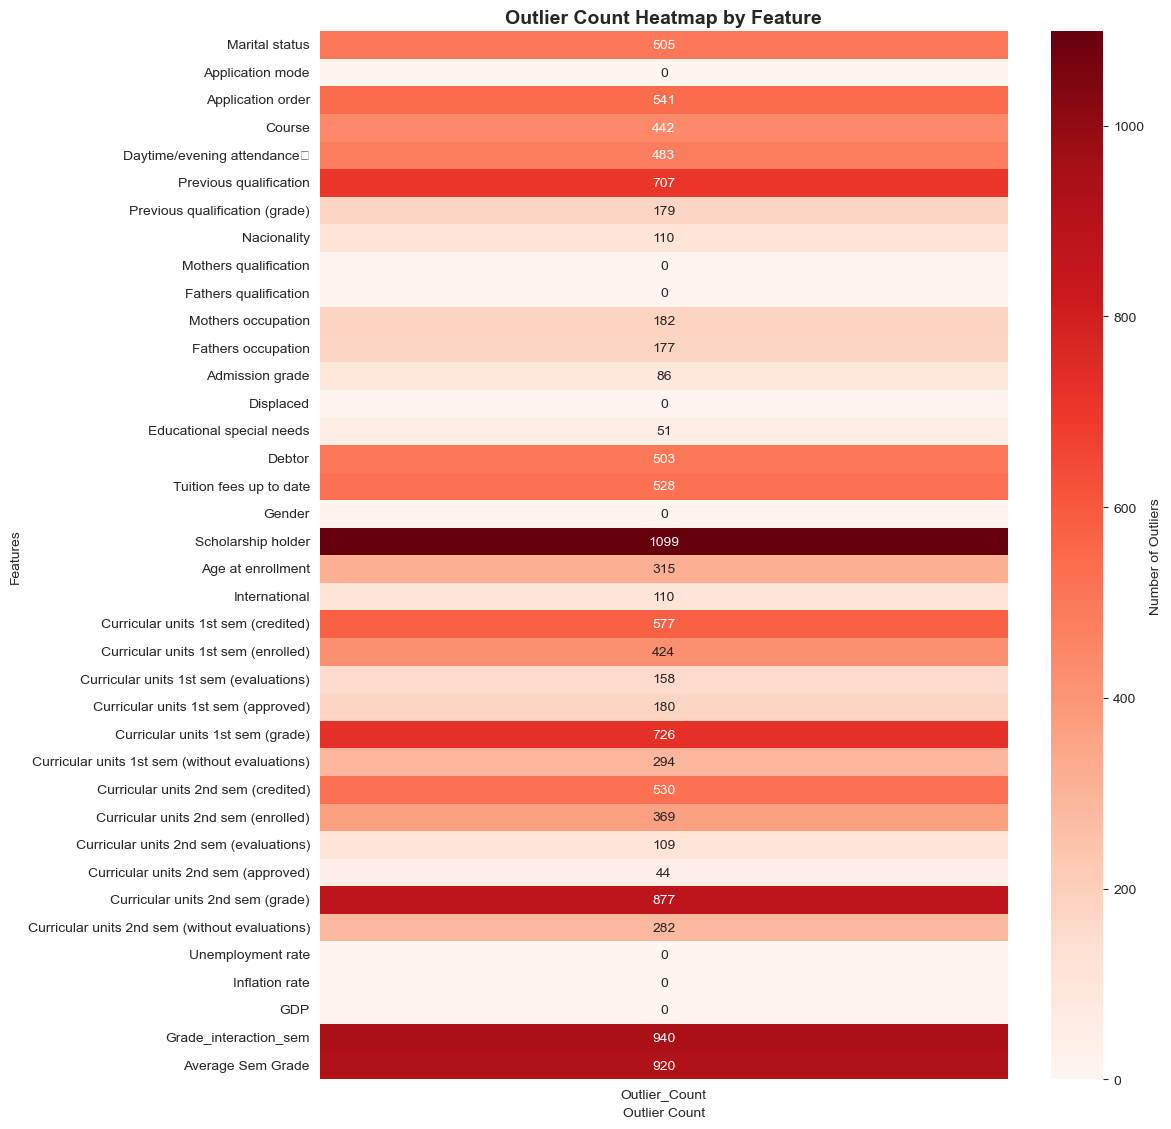


DETAILED OUTLIER VALUES (Top 5 features):

SCHOLARSHIP HOLDER:
  Outlier indices: [6, 8, 11, 13, 14, 20, 23, 25, 47, 48, 49, 50, 51, 52, 61, 62, 66, 76, 77, 78, 85, 86, 97, 111, 116, 123, 127, 130, 135, 137, 138, 141, 143, 144, 145, 149, 156, 157, 159, 161, 165, 175, 181, 187, 190, 204, 207, 209, 210, 211, 212, 213, 216, 218, 220, 221, 223, 224, 227, 229, 233, 235, 236, 237, 242, 244, 246, 249, 251, 255, 258, 260, 267, 268, 269, 270, 278, 279, 280, 281, 283, 288, 291, 293, 294, 295, 296, 301, 302, 312, 313, 316, 318, 321, 334, 337, 351, 353, 358, 363, 365, 366, 368, 371, 372, 377, 378, 380, 383, 389, 395, 397, 400, 410, 414, 418, 420, 430, 431, 432, 433, 435, 436, 437, 443, 445, 446, 449, 451, 459, 461, 467, 468, 469, 470, 471, 479, 481, 484, 485, 488, 489, 504, 520, 523, 530, 542, 543, 544, 577, 585, 587, 592, 596, 604, 606, 607, 609, 610, 614, 615, 616, 618, 623, 624, 630, 632, 633, 634, 635, 636, 639, 645, 653, 655, 665, 667, 670, 672, 679, 681, 682, 705, 730, 751, 752, 754, 770, 7

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify outliers using IQR method
def detect_outliers_iqr(student_data):
    """
    Detect outliers using IQR method for all numeric columns
    Returns dictionary with outlier information for each feature
    """
    numeric_cols = student_data.select_dtypes(include=[np.number]).columns
    outlier_results = {}
    
    for col in numeric_cols:
        Q1 = student_data[col].quantile(0.25)
        Q3 = student_data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = student_data[(student_data[col] < lower_bound) | (student_data[col] > upper_bound)][col]
        
        outlier_results[col] = {
            'outliers_count': len(outliers),
            'outliers_indices': outliers.index.tolist(),
            'outliers_values': outliers.tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return outlier_results

# Detect outliers in your data
outlier_info = detect_outliers_iqr(student_data)

# Print summary
print("OUTLIER DETECTION SUMMARY")
print("=" * 50)
total_outliers = sum(info['outliers_count'] for info in outlier_info.values())
features_with_outliers = sum(1 for info in outlier_info.values() if info['outliers_count'] > 0)

print(f"Total features analyzed: {len(outlier_info)}")
print(f"Total outliers found: {total_outliers}")
print(f"Features with outliers: {features_with_outliers}")

# Show features with most outliers
print(f"\nFEATURES WITH MOST OUTLIERS:")
print("-" * 40)
sorted_features = sorted(outlier_info.items(), key=lambda x: x[1]['outliers_count'], reverse=True)

for feature, info in sorted_features[:10]:  # Top 10
    if info['outliers_count'] > 0:
        print(f"{feature}: {info['outliers_count']} outliers")

# Create boxplots for all features
numeric_cols = student_data.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_cols)

# Calculate subplot dimensions
cols = 6  # Number of columns in the grid
rows = (n_cols + cols - 1) // cols

# Create the plots
fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))
fig.suptitle('Boxplots for Outlier Detection - All Features', fontsize=16, fontweight='bold')

# Flatten axes array for easier indexing
axes = axes.flatten() if n_cols > 1 else [axes]

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    # Create boxplot
    box_plot = ax.boxplot(student_data[col].dropna(), patch_artist=True)
    
    # Customize appearance
    box_plot['boxes'][0].set_facecolor('lightblue')
    box_plot['boxes'][0].set_alpha(0.7)
    
    # Add title with outlier count
    outlier_count = outlier_info[col]['outliers_count']
    ax.set_title(f'{col}\n({outlier_count} outliers)', fontsize=9)
    ax.set_ylabel('Value', fontsize=8)
    ax.grid(True, alpha=0.3)
    
    # Add outlier boundary lines
    info = outlier_info[col]
    ax.axhline(y=info['lower_bound'], color='red', linestyle='--', alpha=0.6, linewidth=1)
    ax.axhline(y=info['upper_bound'], color='red', linestyle='--', alpha=0.6, linewidth=1)

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Create a summary heatmap showing outlier counts
outlier_counts = [outlier_info[col]['outliers_count'] for col in numeric_cols]
outlier_data = pd.DataFrame({
    'Feature': numeric_cols,
    'Outlier_Count': outlier_counts
}).set_index('Feature')

plt.figure(figsize=(12, max(8, len(numeric_cols) * 0.3)))
sns.heatmap(outlier_data, annot=True, cmap='Reds', fmt='d', cbar_kws={'label': 'Number of Outliers'})
plt.title('Outlier Count Heatmap by Feature', fontsize=14, fontweight='bold')
plt.xlabel('Outlier Count')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Optional: Show specific outlier values for features with most outliers
print(f"\nDETAILED OUTLIER VALUES (Top 5 features):")
print("=" * 60)

for feature, info in sorted_features[:5]:
    if info['outliers_count'] > 0:
        print(f"\n{feature.upper()}:")
        print(f"  Outlier indices: {info['outliers_indices']}")
        print(f"  Outlier values: {[round(x, 2) for x in info['outliers_values']]}")
        print(f"  IQR bounds: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")

In [26]:
# =============================================================================
# OUTLIER REMOVAL SECTION
# =============================================================================

def remove_outliers_from_columns(student_data, columns_to_clean, outlier_info):
    """
    Remove outliers from specific columns and create a new dataset
    
    Parameters:
    df: Original DataFrame
    columns_to_clean: List of column names to remove outliers from
    outlier_info: Dictionary with outlier information from detect_outliers_iqr()
    
    Returns:
    clean_df: New DataFrame with outliers removed
    removal_summary: Dictionary with removal statistics
    """
    
    # Start with a copy of the original data
    clean_df = student_data.copy()
    removal_summary = {}
    
    print("OUTLIER REMOVAL PROCESS")
    print("=" * 50)
    
    # Collect all outlier indices to remove
    all_outlier_indices = set()
    
    for col in columns_to_clean:
        if col in outlier_info and col in student_data.columns:
            outlier_indices = set(outlier_info[col]['outliers_indices'])
            all_outlier_indices.update(outlier_indices)
            
            removal_summary[col] = {
                'outliers_removed': len(outlier_indices),
                'outlier_indices': list(outlier_indices)
            }
            
            print(f"{col}: {len(outlier_indices)} outliers identified")
        else:
            print(f"Warning: {col} not found in data or outlier info")
    
    # Remove rows with outliers in any of the specified columns
    clean_df = clean_df.drop(index=all_outlier_indices)
    clean_df = clean_df.reset_index(drop=True)  # Reset index after removal
    
    # Summary statistics
    original_size = len(student_data)
    new_size = len(clean_df)
    removed_count = original_size - new_size
    
    print(f"\nREMOVAL SUMMARY:")
    print("-" * 30)
    print(f"Original dataset size: {original_size}")
    print(f"Rows removed: {removed_count}")
    print(f"New dataset size: {new_size}")
    print(f"Percentage removed: {(removed_count/original_size)*100:.2f}%")
    
    return clean_df, removal_summary

# =============================================================================
# SPECIFY COLUMNS TO CLEAN (MODIFY THIS LIST)
# =============================================================================

# Example: Remove outliers from specific columns
# Modify this list to include the columns you want to clean
columns_to_clean = [
    'Previous qualification',
    'Curricular units 1st sem (credited)',
    'Curricular units 2nd sem (credited)', 
    'Application order',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 2nd sem (enrolled)',
    'Age at enrollment'
    # Add more column names as needed
]

print(f"\n🧹 REMOVING OUTLIERS FROM SELECTED COLUMNS")
print("=" * 60)
print(f"Columns selected for outlier removal: {columns_to_clean}")

# Create the cleaned dataset
student_data_clean, removal_stats = remove_outliers_from_columns(
    student_data, 
    columns_to_clean, 
    outlier_info
)


🧹 REMOVING OUTLIERS FROM SELECTED COLUMNS
Columns selected for outlier removal: ['Previous qualification', 'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)', 'Application order', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 'Age at enrollment']
OUTLIER REMOVAL PROCESS
Previous qualification: 707 outliers identified
Curricular units 1st sem (credited): 577 outliers identified
Curricular units 2nd sem (credited): 530 outliers identified
Application order: 541 outliers identified
Curricular units 1st sem (enrolled): 424 outliers identified
Curricular units 2nd sem (enrolled): 369 outliers identified
Age at enrollment: 315 outliers identified

REMOVAL SUMMARY:
------------------------------
Original dataset size: 4424
Rows removed: 1845
New dataset size: 2579
Percentage removed: 41.70%


In [27]:
# Full initial model - logistic regression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = student_data.drop(columns=['Target'])
Y = student_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

feature_names = X.columns.tolist()
class_names = model.classes_

print("\nFeature-Coefficient Mapping:")
print("=" * 50)

# Create a comprehensive DataFrame showing coefficients for each class
coef_df = pd.DataFrame(
    model.coef_.T,  # Transpose to have features as rows
    index=feature_names,
    columns=[f'Class_{class_name}' for class_name in class_names]
)

print("\nCoefficients by Feature and Class:")
print(coef_df)



Model Intercepts:
[ 0.00831314  0.02390896 -0.0322221 ]
Accuracy: 0.7468926553672316

Feature-Coefficient Mapping:

Coefficients by Feature and Class:
                                                Class_Dropout  Class_Enrolled  \
Marital status                                      -0.021930       -0.083648   
Application mode                                     0.001454        0.002781   
Application order                                    0.026754       -0.002642   
Course                                               0.000101       -0.000039   
Daytime/evening attendance\t                        -0.037076        0.076989   
Previous qualification                              -0.006011       -0.004074   
Previous qualification (grade)                       0.002543       -0.002329   
Nacionality                                          0.005017       -0.002174   
Mothers qualification                                0.004354       -0.007926   
Fathers qualification                 

/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X= student_data_clean.drop(columns=['Target'])
Y = student_data_clean['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

feature_names = X.columns.tolist()
class_names = model.classes_

print("\nFeature-Coefficient Mapping:")
print("=" * 50)

# Create a comprehensive DataFrame showing coefficients for each class
coef_df = pd.DataFrame(
    model.coef_.T,  # Transpose to have features as rows
    index=feature_names,
    columns=[f'Class_{class_name}' for class_name in class_names]
)

print("\nCoefficients by Feature and Class:")
print(coef_df)



Model Intercepts:
[ 0.00967522 -0.00302186 -0.00665336]
Accuracy: 0.7810077519379846

Feature-Coefficient Mapping:

Coefficients by Feature and Class:
                                                Class_Dropout  Class_Enrolled  \
Marital status                                       0.018170       -0.052700   
Application mode                                     0.012891        0.001526   
Application order                                    0.101660        0.079336   
Course                                               0.000125        0.000051   
Daytime/evening attendance\t                         0.040984        0.015562   
Previous qualification                               0.009630       -0.003004   
Previous qualification (grade)                      -0.002918       -0.004565   
Nacionality                                          0.005842       -0.001559   
Mothers qualification                                0.003966       -0.007484   
Fathers qualification                 

In [29]:
daytime = student_data[student_data['Daytime/evening attendance\t'] == 1]
evening = student_data[student_data['Daytime/evening attendance\t'] == 0]

print(evening)
print(daytime)

      Marital status  Application mode  Application order  Course  \
4                  2                39                  1    8014   
5                  2                39                  1    9991   
33                 1                18                  1    8014   
34                 1                 1                  1    9991   
38                 4                39                  1    9991   
...              ...               ...                ...     ...   
4383               1                39                  2    8014   
4387               2                 1                  1    9991   
4393               1                39                  1    9991   
4400               2                39                  1    9991   
4409               2                43                  1    9991   

      Daytime/evening attendance\t  Previous qualification  \
4                                0                       1   
5                                0             

Accuracy: 0.8946280991735537


              precision    recall  f1-score   support

     Dropout       0.90      0.82      0.86      1134
    Graduate       0.89      0.94      0.92      1770

    accuracy                           0.89      2904
   macro avg       0.90      0.88      0.89      2904
weighted avg       0.89      0.89      0.89      2904



[[ 930  204]
 [ 102 1668]]

Top 10 most important features:
                               Feature  Importance
0  Curricular units 2nd sem (approved)    0.148440
1     Curricular units 2nd sem (grade)    0.106747
2                Grade_interaction_sem    0.095557
3                    Average Sem Grade    0.089250
4  Curricular units 1st sem (approved)    0.080566
5              Tuition fees up to date    0.056005
6     Curricular units 1st sem (grade)    0.045771
7                      Admission grade    0.025685
8                    Age at enrollment    0.024925
9       Previous qualification (grade)    0.024288


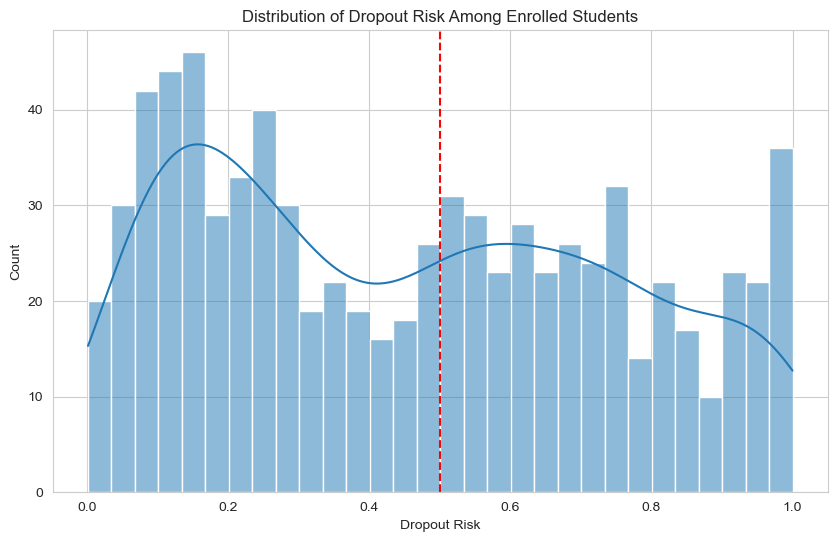

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

dropout_graduated_df = student_data[student_data['Target'].isin(['Dropout', 'Graduate'])]
enrolled_df = student_data[student_data['Target'] == 'Enrolled']

X= dropout_graduated_df.drop(columns=['Target'])
Y = dropout_graduated_df['Target']
X_enrolled = enrolled_df.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=enrolled_df.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

In [31]:
daytime_dropout_graduate = dropout_graduated_df[dropout_graduated_df['Daytime/evening attendance\t'] == 1]
evening_dropout_graduate = dropout_graduated_df[dropout_graduated_df['Daytime/evening attendance\t'] == 0]

daytime_enrolled = enrolled_df[enrolled_df['Daytime/evening attendance\t'] == 1]
evening_enrolled = enrolled_df[enrolled_df['Daytime/evening attendance\t'] == 0]

Accuracy: 0.8925523661753297


              precision    recall  f1-score   support

     Dropout       0.88      0.83      0.85       964
    Graduate       0.90      0.93      0.92      1614

    accuracy                           0.89      2578
   macro avg       0.89      0.88      0.88      2578
weighted avg       0.89      0.89      0.89      2578



[[ 796  168]
 [ 109 1505]]

Top 10 most important features:
                               Feature  Importance
0  Curricular units 2nd sem (approved)    0.167629
1  Curricular units 1st sem (approved)    0.101836
2                Grade_interaction_sem    0.092962
3                    Average Sem Grade    0.087695
4     Curricular units 2nd sem (grade)    0.086150
5     Curricular units 1st sem (grade)    0.047329
6              Tuition fees up to date    0.038967
7                      Admission grade    0.028083
8                    Age at enrollment    0.027575
9       Previous qualification (grade)    0.026790


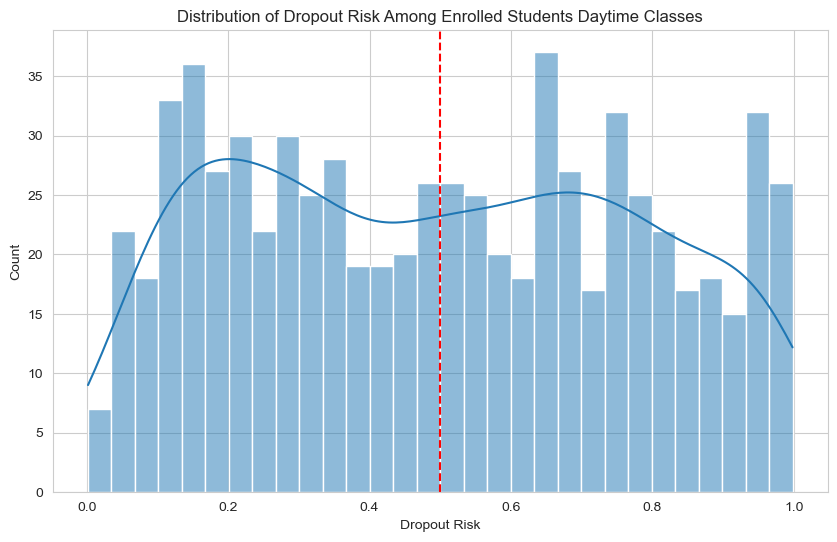

In [32]:
## Full daytime model - RandomForest
from sklearn.feature_selection import RFECV
X= daytime_dropout_graduate.drop(columns=['Target'])
Y = daytime_dropout_graduate['Target']
X_daytime_enrolled = daytime_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_daytime_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_daytime_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=daytime_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students Daytime Classes')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()


In [33]:
# Recursive Feature Elimination (RFE) - Full daytime logistic regression model. 
from sklearn.feature_selection import RFE
rfe_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rfe = RFE(rfe_model, n_features_to_select=30)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)

selector = RFECV(rf_classifier, cv=5)
selector = selector.fit(X, Y)

# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)

# Print the selected features
print("Selected features: %s" % selector.support_)


Selected Features by RFE:
Index(['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Displaced', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Grade_interaction_sem', 'Average Sem Grade'],
      dtype='object')
Optimal number of features: 33
Selected features: [False  True  True  True 

In [34]:
## Information gain - daytime model

from sklearn.feature_selection import mutual_info_classif
X, Y = daytime_dropout_graduate.drop(columns=['Target']), daytime_dropout_graduate['Target']

# Calculate Information Gain using mutual_info_classif
info_gain = mutual_info_classif(X, Y)
print("Information Gain for each feature:", info_gain)

# Get feature names
feature_names = X.columns.tolist()
# Sort features by information gain (highest to lowest)
feature_gain_pairs = list(zip(feature_names, info_gain))
sorted_features = sorted(feature_gain_pairs, key=lambda x: x[1], reverse=True)

print("Features ranked by Information Gain (highest to lowest):")
print("-" * 60)
for i, (feature, gain) in enumerate(sorted_features, 1):
    print(f"{i:2d}. {feature:<35}: {gain:.6f}")

print()

# Show top 5 most informative features
print("Top 5 Most Informative Features:")
print("-" * 40)
for i, (feature, gain) in enumerate(sorted_features[:5], 1):
    print(f"{i}. {feature}: {gain:.6f}")

Information Gain for each feature: [0.01314846 0.05412461 0.01062538 0.05349046 0.00496313 0.02032316
 0.03416616 0.00476234 0.01434286 0.02617107 0.02053689 0.01796166
 0.03467036 0.         0.         0.03301267 0.09205595 0.038481
 0.04657016 0.0779838  0.00815319 0.00918444 0.04208787 0.07675657
 0.25366029 0.18290619 0.         0.         0.04183452 0.07604447
 0.31241921 0.24412126 0.         0.0134624  0.         0.
 0.23530119 0.2399691 ]
Features ranked by Information Gain (highest to lowest):
------------------------------------------------------------
 1. Curricular units 2nd sem (approved): 0.312419
 2. Curricular units 1st sem (approved): 0.253660
 3. Curricular units 2nd sem (grade)   : 0.244121
 4. Average Sem Grade                  : 0.239969
 5. Grade_interaction_sem              : 0.235301
 6. Curricular units 1st sem (grade)   : 0.182906
 7. Tuition fees up to date            : 0.092056
 8. Age at enrollment                  : 0.077984
 9. Curricular units 1st sem (e

Accuracy: 0.8952676493405741


              precision    recall  f1-score   support

     Dropout       0.88      0.83      0.86       964
    Graduate       0.90      0.94      0.92      1614

    accuracy                           0.90      2578
   macro avg       0.89      0.88      0.89      2578
weighted avg       0.89      0.90      0.89      2578



[[ 798  166]
 [ 104 1510]]

Top 5 most important features:
                               Feature  Importance
0  Curricular units 2nd sem (approved)    0.184830
1  Curricular units 1st sem (approved)    0.101468
2     Curricular units 2nd sem (grade)    0.086499
3                Grade_interaction_sem    0.085938
4                    Average Sem Grade    0.084558


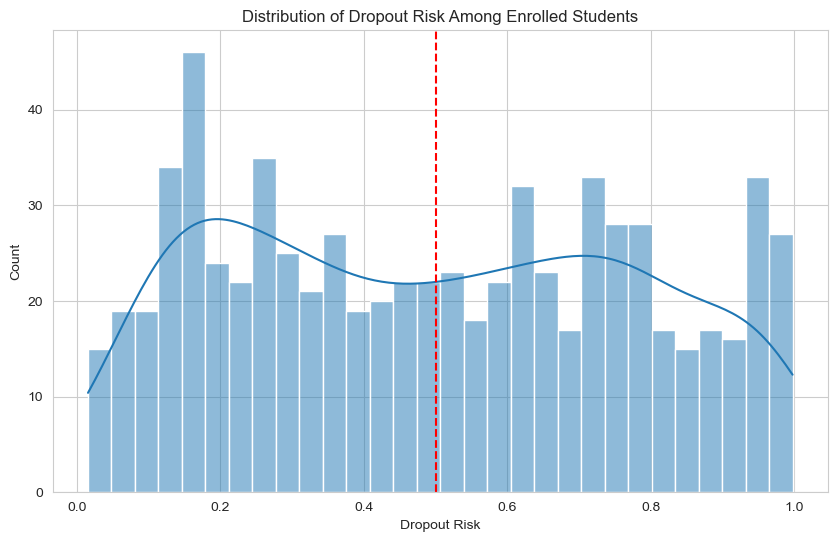


Selected Features by RFE:
Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Fathers qualification', 'Mothers occupation', 'Fathers occupation',
       'Admission grade', 'Tuition fees up to date', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Grade_interaction_sem', 'Average Sem Grade'],
      dtype='object')


In [36]:
## Refined model 1 - Daytime students
X = daytime_dropout_graduate[['Marital status', 'Application mode', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Grade_interaction_sem', 'Average Sem Grade']]
Y = daytime_dropout_graduate['Target']
X_daytime_enrolled = daytime_enrolled[['Marital status', 'Application mode', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Grade_interaction_sem', 'Average Sem Grade']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=5000, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 5 most important features:")
print(top_features.head(5))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_daytime_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_daytime_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=daytime_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

# Recursive Feature Elimination (RFE) - Full daytime logistic regression model. 
from sklearn.feature_selection import RFE
rfe_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rfe = RFE(rfe_model, n_features_to_select=22)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)


Accuracy: 0.8975950349107835


              precision    recall  f1-score   support

     Dropout       0.89      0.83      0.86       964
    Graduate       0.90      0.94      0.92      1614

    accuracy                           0.90      2578
   macro avg       0.90      0.88      0.89      2578
weighted avg       0.90      0.90      0.90      2578



[[ 801  163]
 [ 101 1513]]

Top 5 most important features:
                               Feature  Importance
0  Curricular units 2nd sem (approved)    0.257294
1  Curricular units 1st sem (approved)    0.151934
2     Curricular units 1st sem (grade)    0.095976
3              Tuition fees up to date    0.049692
4                    Age at enrollment    0.044694


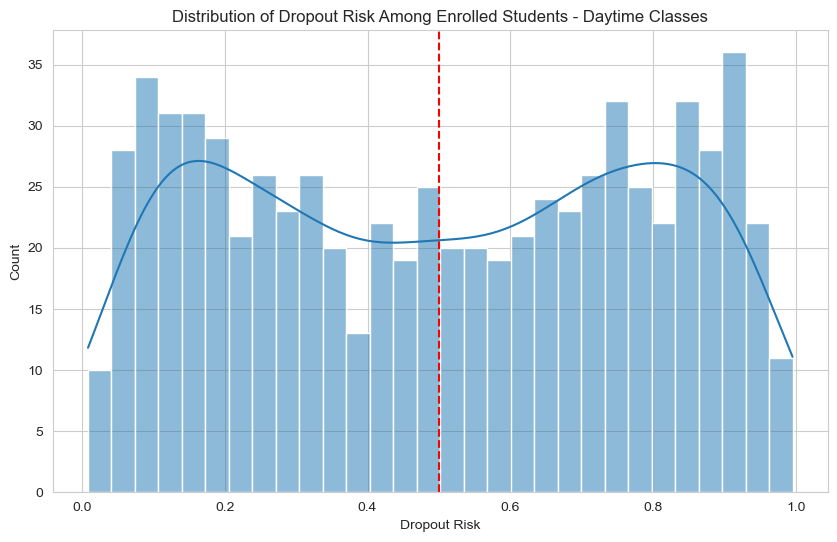

In [ ]:
## Refined model 2 - Daytime Students

X = daytime_dropout_graduate[['Application mode', 'Course', 'Previous qualification (grade)', 'Fathers qualification', 
       'Mothers occupation','Fathers occupation', 'Admission grade', 'Debtor',
       'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]
Y = daytime_dropout_graduate['Target']
X_daytime_enrolled = daytime_enrolled[['Application mode', 'Course', 'Previous qualification (grade)', 'Fathers qualification', 
       'Mothers occupation','Fathers occupation', 'Admission grade', 'Debtor',
       'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=5000, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 5 most important features:")
print(top_features.head(5))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_daytime_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_daytime_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=daytime_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students - Daytime Classes')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()



Accuracy: 0.8776758409785933


              precision    recall  f1-score   support

     Dropout       0.96      0.80      0.87       171
    Graduate       0.82      0.96      0.88       156

    accuracy                           0.88       327
   macro avg       0.89      0.88      0.88       327
weighted avg       0.89      0.88      0.88       327



[[137  34]
 [  6 150]]

Top 10 most important features:
                                  Feature  Importance
0     Curricular units 1st sem (approved)    0.128261
1     Curricular units 2nd sem (approved)    0.123907
2                   Grade_interaction_sem    0.108169
3                       Average Sem Grade    0.106302
4        Curricular units 2nd sem (grade)    0.078207
5        Curricular units 1st sem (grade)    0.076337
6                 Tuition fees up to date    0.038097
7  Curricular units 1st sem (evaluations)    0.027896
8  Curricular units 2nd sem (evaluations)    0.027847
9     Curricular units 1st sem (credited)   

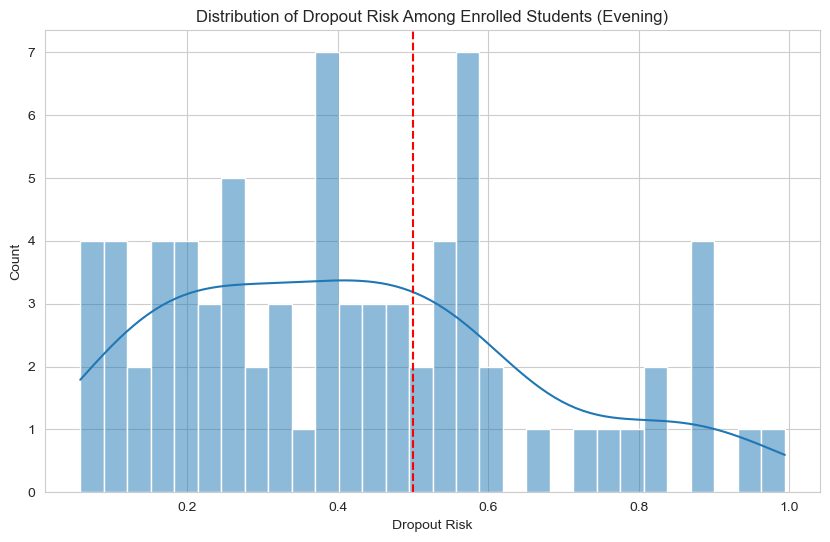


Selected Features by RFE:
Index(['Application mode', 'Course', 'Previous qualification',
       'Previous qualification (grade)', 'Mothers qualification',
       'Fathers qualification', 'Mothers occupation', 'Fathers occupation',
       'Admission grade', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Grade_interaction_sem', 'Average Sem Grade'],


In [53]:
## Full Random forest model - evening students 

X= evening_dropout_graduate.drop(columns=['Target'])
Y = evening_dropout_graduate['Target']
X_enrolled_evening = evening_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_enrolled_evening)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_enrolled_evening)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=evening_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students (Evening)')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe_model = RandomForestClassifier(n_estimators=500, random_state=42)
rfe = RFE(rfe_model, n_features_to_select=30)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)

selector = RFECV(rf_classifier, cv=5)
selector = selector.fit(X, Y)

# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)

# Print the selected features
print("Selected features: %s" % selector.support_)
print(X.columns[selector.support_])

In [52]:
from sklearn.feature_selection import mutual_info_classif
X, Y = evening_dropout_graduate.drop(columns=['Target']), evening_dropout_graduate['Target']

# Calculate Information Gain using mutual_info_classif
info_gain = mutual_info_classif(X, Y)
# Get feature names
feature_names = X.columns.tolist()
# Sort features by information gain (highest to lowest)
feature_gain_pairs = list(zip(feature_names, info_gain))
sorted_features = sorted(feature_gain_pairs, key=lambda x: x[1], reverse=True)

print("Features ranked by Information Gain (highest to lowest):")
print("-" * 60)
for i, (feature, gain) in enumerate(sorted_features, 1):
    print(f"{i:2d}. {feature:<35}: {gain:.6f}")

print()

# Show top 5 most informative features
print("Top 5 Most Informative Features:")
print("-" * 40)
for i, (feature, gain) in enumerate(sorted_features[:5], 1):
    print(f"{i}. {feature}: {gain:.6f}")

Features ranked by Information Gain (highest to lowest):
------------------------------------------------------------
 1. Curricular units 2nd sem (approved): 0.376180
 2. Curricular units 1st sem (approved): 0.368478
 3. Curricular units 1st sem (grade)   : 0.343562
 4. Average Sem Grade                  : 0.319501
 5. Grade_interaction_sem              : 0.311067
 6. Curricular units 2nd sem (grade)   : 0.289911
 7. Tuition fees up to date            : 0.112649
 8. Curricular units 2nd sem (evaluations): 0.096453
 9. Curricular units 1st sem (evaluations): 0.085824
10. Curricular units 2nd sem (enrolled): 0.069543
11. Nacionality                        : 0.068012
12. Application mode                   : 0.051482
13. Curricular units 1st sem (enrolled): 0.048125
14. Curricular units 1st sem (credited): 0.042445
15. Daytime/evening attendance	        : 0.040976
16. Curricular units 2nd sem (credited): 0.038264
17. Gender                             : 0.035449
18. International         

Accuracy: 0.8776758409785933


              precision    recall  f1-score   support

     Dropout       0.96      0.80      0.87       171
    Graduate       0.81      0.97      0.88       156

    accuracy                           0.88       327
   macro avg       0.89      0.88      0.88       327
weighted avg       0.89      0.88      0.88       327



[[136  35]
 [  5 151]]

Top 5 most important features:
                               Feature  Importance
0  Curricular units 2nd sem (approved)    0.139296
1  Curricular units 1st sem (approved)    0.127312
2                    Average Sem Grade    0.106089
3                Grade_interaction_sem    0.105903
4     Curricular units 2nd sem (grade)    0.087427


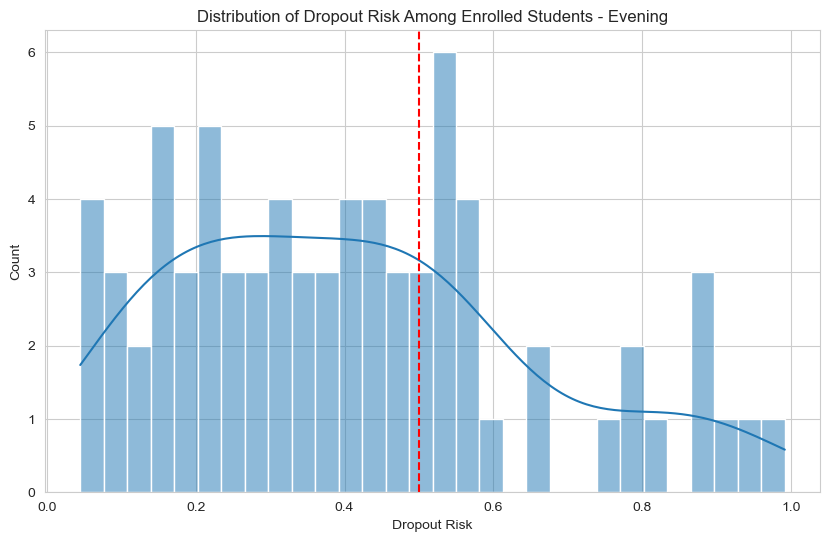


Selected Features by RFE:
Index(['Application mode', 'Previous qualification (grade)',
       'Fathers occupation', 'Admission grade', 'Tuition fees up to date',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Inflation rate', 'GDP',
       'Grade_interaction_sem', 'Average Sem Grade'],
      dtype='object')


In [57]:
## Refined random forest model 1 - evening students
X = evening_dropout_graduate[['Application mode', 'Course', 'Previous qualification',
       'Previous qualification (grade)', 'Mothers qualification',
       'Fathers qualification', 'Mothers occupation', 'Fathers occupation',
       'Admission grade', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Grade_interaction_sem', 'Average Sem Grade']]
Y = evening_dropout_graduate['Target']
X_enrolled_evening = evening_enrolled[['Application mode', 'Course', 'Previous qualification',
       'Previous qualification (grade)', 'Mothers qualification',
       'Fathers qualification', 'Mothers occupation', 'Fathers occupation',
       'Admission grade', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Grade_interaction_sem', 'Average Sem Grade']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=5000, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 5 most important features:")
print(top_features.head(5))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_enrolled_evening)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_enrolled_evening)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=evening_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students - Evening')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()
from sklearn.feature_selection import RFE
rfe_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rfe = RFE(rfe_model, n_features_to_select=20)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)


Accuracy: 0.8837920489296636


              precision    recall  f1-score   support

     Dropout       0.97      0.80      0.88       171
    Graduate       0.82      0.97      0.89       156

    accuracy                           0.88       327
   macro avg       0.89      0.89      0.88       327
weighted avg       0.90      0.88      0.88       327



[[137  34]
 [  4 152]]

Top 5 most important features:
                               Feature  Importance
0  Curricular units 2nd sem (approved)    0.148837
1  Curricular units 1st sem (approved)    0.133800
2                Grade_interaction_sem    0.118429
3                    Average Sem Grade    0.111300
4     Curricular units 2nd sem (grade)    0.091141


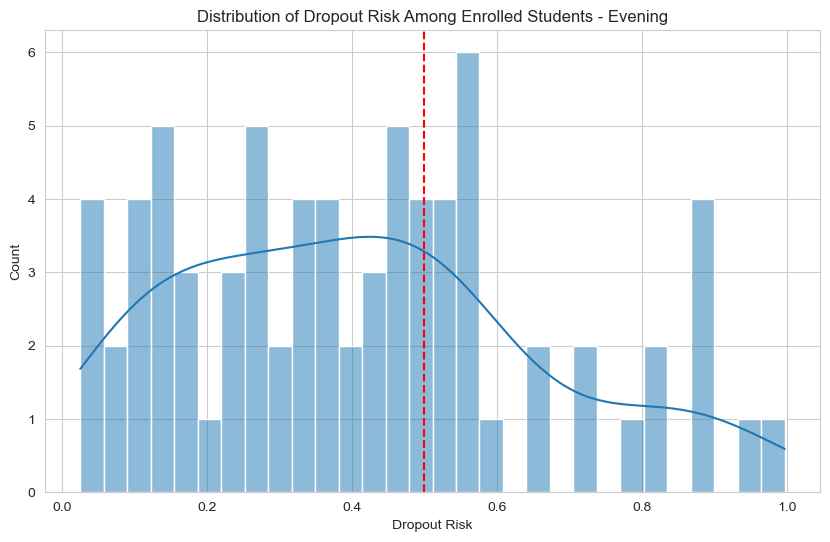

Encoded labels: ['Dropout' 'Graduate']
Label mapping: {'Dropout': 0, 'Graduate': 1}
AUC-ROC: 0.8878


In [62]:
## Refined random forest model 2 - evening students
X2 = evening_dropout_graduate[['Application mode', 'Previous qualification (grade)',
       'Fathers occupation', 'Admission grade', 'Tuition fees up to date',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Inflation rate', 'GDP',
       'Grade_interaction_sem', 'Average Sem Grade']]
Y2 = evening_dropout_graduate['Target']
X_enrolled_evening = evening_enrolled[['Application mode', 'Previous qualification (grade)',
       'Fathers occupation', 'Admission grade', 'Tuition fees up to date',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Inflation rate', 'GDP',
       'Grade_interaction_sem', 'Average Sem Grade']]

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=5000, random_state=42)

# Train the classifier
rf_classifier.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = rf_classifier.predict(X2_test)

# Evaluate the model
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y2_test, y2_pred))
print("\n")
print(confusion_matrix(y2_test,y2_pred))
    
# Get feature importance
features = X2_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 5 most important features:")
print(top_features.head(5))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_enrolled_evening)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_enrolled_evening)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=evening_enrolled.index)
from sklearn.metrics import roc_auc_score, roc_curve   
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students - Evening')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y2_test_encoded = le.fit_transform(y2_test)
print("Encoded labels:", le.classes_)
print("Label mapping:", dict(zip(le.classes_, range(len(le.classes_)))))
y2_pred_encoded = le.fit_transform(y2_pred)

auc = roc_auc_score(y2_test_encoded, y2_pred_encoded)
print(f"AUC-ROC: {auc:.4f}")
    
# Create ROC curve
fpr, tpr, thresholds = roc_curve(y2_test_encoded, y2_pred_encoded)


Accuracy: 0.8968192397207138


              precision    recall  f1-score   support

     Dropout       0.88      0.84      0.86       964
    Graduate       0.91      0.93      0.92      1614

    accuracy                           0.90      2578
   macro avg       0.89      0.89      0.89      2578
weighted avg       0.90      0.90      0.90      2578



[[ 813  151]
 [ 115 1499]]

Top 10 most important features:
                                          Feature  Importance
0                Curricular units 1st sem (grade)    0.168175
1                               Age at enrollment    0.150794
2  Curricular units 1st sem (without evaluations)    0.124863
3                                   International    0.108057
4                                 Admission grade    0.047400
5             Curricular units 1st sem (approved)    0.036524
6                    Daytime/evening attendance\t    0.033539
7                              Scholarship holder    0.030894
8                     

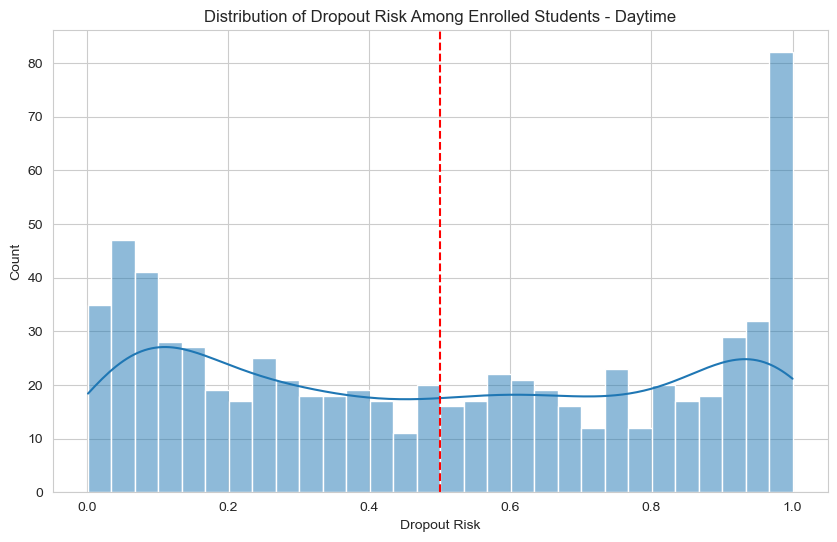

Features ranked by Information Gain (highest to lowest):
------------------------------------------------------------
 1. Curricular units 2nd sem (approved): 0.308563
 2. Curricular units 1st sem (approved): 0.248507
 3. Curricular units 2nd sem (grade)   : 0.243287
 4. Curricular units 1st sem (grade)   : 0.187696
 5. Tuition fees up to date            : 0.099515
 6. Curricular units 1st sem (evaluations): 0.093249
 7. Curricular units 2nd sem (evaluations): 0.084258
 8. Course                             : 0.071761
 9. Age at enrollment                  : 0.064322
10. Scholarship holder                 : 0.063569
11. Curricular units 1st sem (enrolled): 0.050726
12. Application mode                   : 0.048875
13. Previous qualification (grade)     : 0.040649
14. Admission grade                    : 0.040649
15. Curricular units 2nd sem (enrolled): 0.036204
16. Previous qualification             : 0.034448
17. Gender                             : 0.032658
18. Fathers qualification 

In [ ]:
## Full logistic regression model - daytime students

from sklearn.feature_selection import mutual_info_classif
X_2= daytime_dropout_graduate.drop(columns=['Target'])
Y_2 = daytime_dropout_graduate['Target']
X_daytime_enrolled = daytime_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.8, random_state=42)

# Create a multinomial logistic regression model
daytime_model = LogisticRegression(solver='lbfgs', max_iter = 10000)

# Train the classifier
daytime_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = daytime_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = daytime_model.predict_proba(X_daytime_enrolled)[:, 0]  # Probability of dropout
grad_probs = daytime_model.predict_proba(X_daytime_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=daytime_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students - Daytime')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

# Calculate Information Gain using mutual_info_classif
info_gain = mutual_info_classif(X_2, Y_2)

# Get feature names
feature_names = X_2.columns.tolist()
# Sort features by information gain (highest to lowest)
feature_gain_pairs = list(zip(feature_names, info_gain))
sorted_features = sorted(feature_gain_pairs, key=lambda x: x[1], reverse=True)

print("Features ranked by Information Gain (highest to lowest):")
print("-" * 60)
for i, (feature, gain) in enumerate(sorted_features, 1):
    print(f"{i:2d}. {feature:<35}: {gain:.6f}")

print()

# Show top 5 most informative features
print("Top 5 Most Informative Features:")
print("-" * 40)
for i, (feature, gain) in enumerate(sorted_features[:5], 1):
    print(f"{i}. {feature}: {gain:.6f}")

# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe = RFE(daytime_model, n_features_to_select=30)
rfe.fit(X_train, y_train)


rfe_features = X_2.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)

selector = RFECV(daytime_model, cv=5)
selector = selector.fit(X_2, Y_2)

# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)

# Print the selected features
print("Selected features: %s" % selector.support_)



Accuracy: 0.8995345228859581


              precision    recall  f1-score   support

     Dropout       0.88      0.85      0.86       964
    Graduate       0.91      0.93      0.92      1614

    accuracy                           0.90      2578
   macro avg       0.90      0.89      0.89      2578
weighted avg       0.90      0.90      0.90      2578



[[ 816  148]
 [ 111 1503]]

Top 10 most important features:
                                          Feature  Importance
0             Curricular units 2nd sem (enrolled)    0.168175
1             Curricular units 1st sem (enrolled)    0.150794
2          Curricular units 2nd sem (evaluations)    0.124863
3          Curricular units 1st sem (evaluations)    0.108057
4                                          Debtor    0.047400
5             Curricular units 2nd sem (credited)    0.036524
6                          Previous qualification    0.033539
7             Curricular units 1st sem (credited)    0.030894
8                     

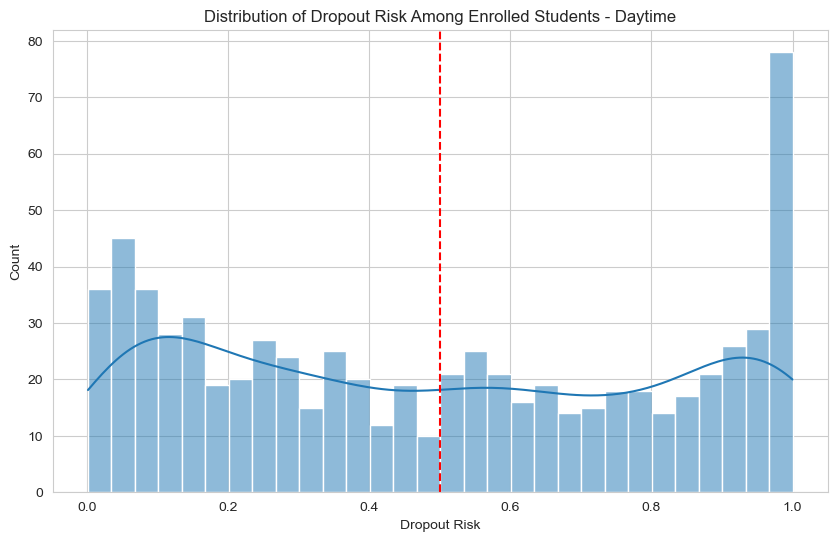

In [59]:
## Refined logistic regression model 1 - daytime students 
from sklearn.feature_selection import mutual_info_classif
X_2= daytime_dropout_graduate[['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)', 'Nacionality', 'Fathers qualification',
       'Mothers occupation', 'Fathers occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]
Y_2 = daytime_dropout_graduate['Target']
X_daytime_enrolled = daytime_enrolled[['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)', 'Nacionality', 'Fathers qualification',
       'Mothers occupation', 'Fathers occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.8, random_state=42)

# Create a multinomial logistic regression model
daytime_model = LogisticRegression(solver='lbfgs', max_iter = 10000)

# Train the classifier
daytime_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = daytime_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = daytime_model.predict_proba(X_daytime_enrolled)[:, 0]  # Probability of dropout
grad_probs = daytime_model.predict_proba(X_daytime_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=daytime_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students - Daytime')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()



Accuracy: 0.9006982156710628


              precision    recall  f1-score   support

     Dropout       0.88      0.84      0.86       964
    Graduate       0.91      0.93      0.92      1614

    accuracy                           0.90      2578
   macro avg       0.90      0.89      0.89      2578
weighted avg       0.90      0.90      0.90      2578



[[ 814  150]
 [ 106 1508]]

Top 10 most important features:
                                          Feature  Importance
0                         Tuition fees up to date    2.453244
1             Curricular units 2nd sem (approved)    1.177810
2                                   International    1.116588
3                                          Debtor    1.097886
4             Curricular units 2nd sem (enrolled)    0.690635
5  Curricular units 1st sem (without evaluations)    0.688293
6                                       Displaced    0.539108
7             Curricular units 1st sem (approved)    0.505920
8                     

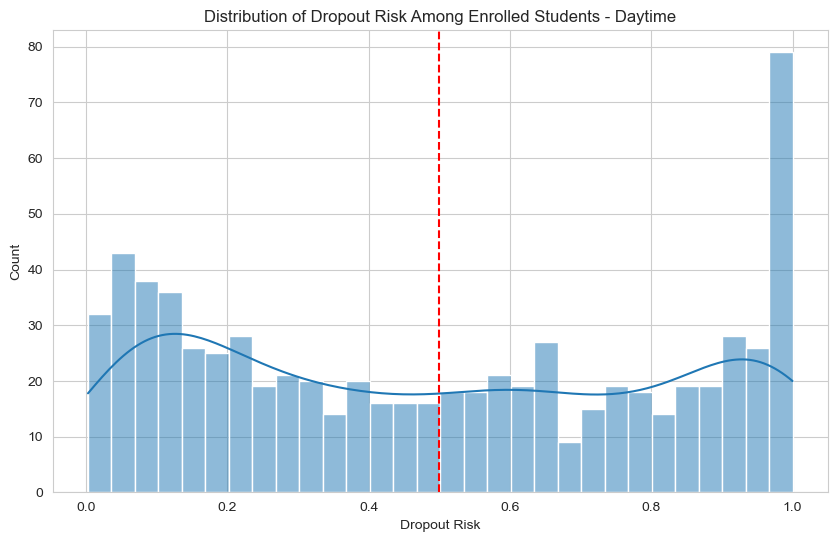

Encoded labels: ['Dropout' 'Graduate']
Label mapping: {'Dropout': 0, 'Graduate': 1}
AUC-ROC: 0.8894


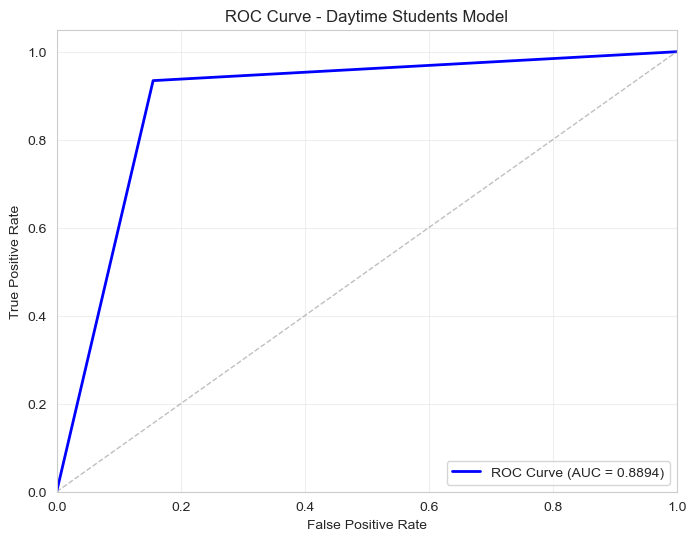

In [47]:
## Refined logistic regression model 2 - daytime students 
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_selection import mutual_info_classif
X_3= daytime_dropout_graduate[['Marital status', 'Application mode', 'Application order',
       'Previous qualification', 'Nacionality', 'Fathers qualification',
       'Mothers occupation', 'Fathers occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate']]
Y_3 = daytime_dropout_graduate['Target']
X_daytime_enrolled = daytime_enrolled[['Marital status', 'Application mode', 'Application order',
       'Previous qualification', 'Nacionality', 'Fathers qualification',
       'Mothers occupation', 'Fathers occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_3, Y_3, test_size=0.8, random_state=42)

# Create a multinomial logistic regression model
daytime_model = LogisticRegression(solver='lbfgs', max_iter = 10000)

# Train the classifier
daytime_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = daytime_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
# Get feature importance
if len(daytime_model.classes_) > 2:  # Multiclass
    importances = np.mean(np.abs(daytime_model.coef_), axis=0)
else:  # Binary classification
    importances = np.abs(daytime_model.coef_[0])
features = X_train.columns
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = daytime_model.predict_proba(X_daytime_enrolled)[:, 0]  # Probability of dropout
grad_probs = daytime_model.predict_proba(X_daytime_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=daytime_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students - Daytime')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()
# Create label encoder for string labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
print("Encoded labels:", le.classes_)
print("Label mapping:", dict(zip(le.classes_, range(len(le.classes_)))))
y_pred_encoded = le.fit_transform(y_pred)

auc = roc_auc_score(y_test_encoded, y_pred_encoded)
print(f"AUC-ROC: {auc:.4f}")
    
# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_encoded)
    
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Daytime Students Model')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


Accuracy: 0.8440366972477065


              precision    recall  f1-score   support

     Dropout       0.88      0.81      0.84       171
    Graduate       0.81      0.88      0.84       156

    accuracy                           0.84       327
   macro avg       0.85      0.85      0.84       327
weighted avg       0.85      0.84      0.84       327



[[139  32]
 [ 19 137]]

Top 10 most important features:
                                  Feature  Importance
0                      Fathers occupation    2.453244
1        Curricular units 1st sem (grade)    1.177810
2                                  Debtor    1.116588
3                      Mothers occupation    1.097886
4  Curricular units 1st sem (evaluations)    0.690635
5     Curricular units 1st sem (credited)    0.688293
6                   Mothers qualification    0.539108
7                       Age at enrollment    0.505920
8                               Displaced    0.460070
9     Curricular units 1st sem (enrolled)   

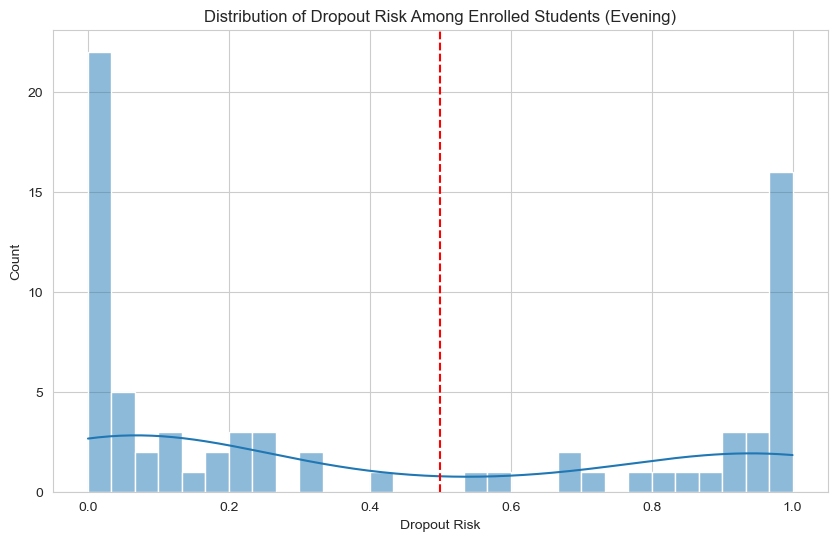


Selected Features by RFE:
Index(['Marital status', 'Application mode', 'Application order',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mothers qualification', 'Fathers qualification',
       'Mothers occupation', 'Fathers occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'GDP'],

In [68]:
## Full logistic regression model for evening students 

X= evening_dropout_graduate.drop(columns=['Target'])
Y = evening_dropout_graduate['Target']
X_evening_enrolled = evening_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a multinomial logistic regression model
evening_model = LogisticRegression(solver='lbfgs', max_iter = 10000)

# Train the classifier
evening_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = evening_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = evening_model.predict_proba(X_evening_enrolled)[:, 0]  # Probability of dropout
grad_probs = evening_model.predict_proba(X_evening_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=evening_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students (Evening)')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe = RFE(daytime_model, n_features_to_select=30)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)

selector = RFECV(daytime_model, cv=5)
selector = selector.fit(X, Y)

# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)

# Print the selected features
print("Selected features: %s" % selector.support_)

Accuracy: 0.8348623853211009


              precision    recall  f1-score   support

     Dropout       0.88      0.80      0.83       171
    Graduate       0.80      0.88      0.84       156

    accuracy                           0.83       327
   macro avg       0.84      0.84      0.83       327
weighted avg       0.84      0.83      0.83       327



[[136  35]
 [ 19 137]]

Top 10 most important features:
                                          Feature  Importance
0                                       Displaced    2.453244
1          Curricular units 2nd sem (evaluations)    1.177810
2                              Scholarship holder    1.116588
3                                 Admission grade    1.097886
4             Curricular units 2nd sem (credited)    0.690635
5                Curricular units 1st sem (grade)    0.688293
6                              Mothers occupation    0.539108
7          Curricular units 1st sem (evaluations)    0.505920
8                         

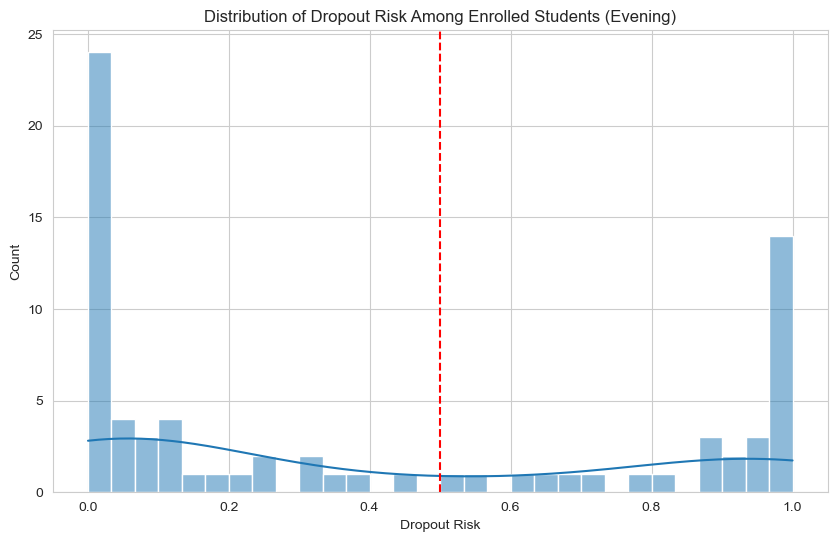

In [71]:
## Refined logistic regression model -1 for evening students 

X= evening_dropout_graduate[['Marital status', 'Application mode', 'Application order',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mothers qualification', 'Fathers qualification',
       'Mothers occupation', 'Fathers occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'GDP']]
Y = evening_dropout_graduate['Target']
X_evening_enrolled = evening_enrolled[['Marital status', 'Application mode', 'Application order',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mothers qualification', 'Fathers qualification',
       'Mothers occupation', 'Fathers occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'GDP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a multinomial logistic regression model
evening_model = LogisticRegression(solver='lbfgs', max_iter = 10000)

# Train the classifier
evening_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = evening_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = evening_model.predict_proba(X_evening_enrolled)[:, 0]  # Probability of dropout
grad_probs = evening_model.predict_proba(X_evening_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=evening_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students (Evening)')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

Accuracy: 0.8868501529051988


              precision    recall  f1-score   support

     Dropout       0.97      0.81      0.88       171
    Graduate       0.82      0.97      0.89       156

    accuracy                           0.89       327
   macro avg       0.90      0.89      0.89       327
weighted avg       0.90      0.89      0.89       327



[[138  33]
 [  4 152]]

Top 10 most important features:
                               Feature  Importance
0  Curricular units 1st sem (approved)    1.443567
1                               Gender    0.867170
2  Curricular units 1st sem (credited)    0.765523
3  Curricular units 1st sem (enrolled)    0.706378
4  Curricular units 2nd sem (approved)    0.538352
5                            Displaced    0.502133
6              Tuition fees up to date    0.434797
7     Curricular units 1st sem (grade)    0.329105
8                   Scholarship holder    0.320918
9                       Marital status    0.267881


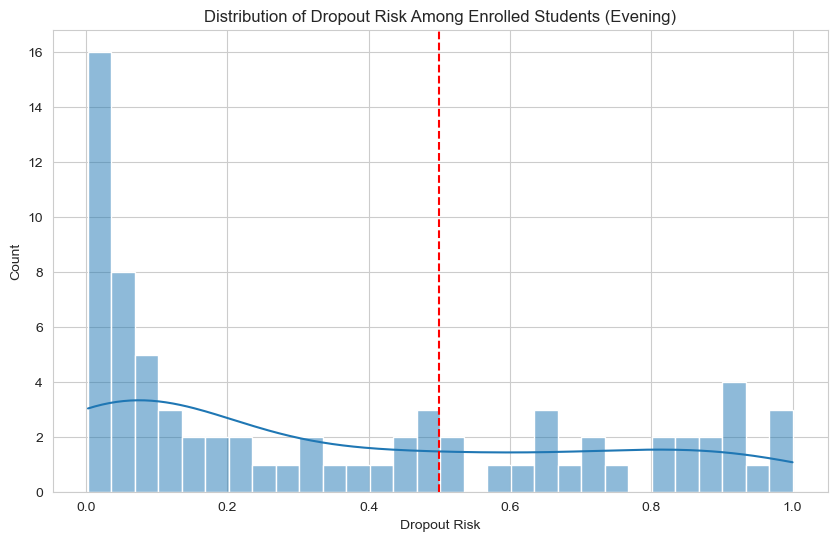

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Admission grade
- Application mode
- Course
- Curricular units 1st sem (evaluations)
- Curricular units 2nd sem (evaluations)
- ...


In [147]:
## Refined logistic regression model 2 for evening students 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
X= evening_dropout_graduate[['Marital status', 'Application order', 'Mothers qualification',
                             'Fathers qualification', 'Displaced' , 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment',
       'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
       'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
       'Unemployment rate', 'GDP']]
Y = evening_dropout_graduate['Target']
X_evening_enrolled = evening_enrolled[['Marital status', 'Application order', 'Mothers qualification',
                             'Fathers qualification', 'Displaced' , 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment',
       'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
       'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
       'Unemployment rate', 'GDP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a multinomial logistic regression model
evening_model = LogisticRegression(solver='lbfgs', max_iter = 10000)

# Train the classifier
evening_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = evening_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
if len(evening_model.classes_) > 2:  # Multiclass
    importances = np.mean(np.abs(evening_model.coef_), axis=0)
else:  # Binary classification
    importances = np.abs(evening_model.coef_[0])  
# Get feature importance
features = X_train.columns
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = evening_model.predict_proba(X_evening_enrolled)[:, 0]  # Probability of dropout
grad_probs = evening_model.predict_proba(X_evening_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=evening_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students (Evening)')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

# Get probability predictions (use the positive class probability)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for positive class

# Calculate ROC AUC with probabilities
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc}")

# Calculate and plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    

In [84]:
special_needs = student_data[student_data['Educational special needs'] == 1]
no_special_needs = student_data[student_data['Educational special needs'] == 0]

print(special_needs)


      Marital status  Application mode  Application order  Course  \
42                 1                 1                  6    9500   
221                2                 1                  4    9853   
237                1                17                  2    9238   
391                1                39                  1    9500   
402                1                 1                  1    9773   
478                1                 1                  1    9500   
494                1                 1                  1    9853   
509                1                 1                  2    9147   
598                1                17                  1    9670   
629                1                 1                  1    9773   
836                1                17                  3    9119   
855                1                 1                  3    9773   
864                1                44                  1    9085   
1000               1              

In [99]:
special_needs_dropout_graduate = dropout_graduated_df[dropout_graduated_df['Educational special needs'] == 1]
no_special_needs_dropout_graduate = dropout_graduated_df[dropout_graduated_df['Educational special needs'] == 0]

special_needs_enrolled = enrolled_df[enrolled_df['Educational special needs'] == 1]
no_special_needs_enrolled = enrolled_df[enrolled_df['Educational special needs'] == 0]

Accuracy: 0.78125


              precision    recall  f1-score   support

     Dropout       0.82      0.64      0.72        14
    Graduate       0.76      0.89      0.82        18

    accuracy                           0.78        32
   macro avg       0.79      0.77      0.77        32
weighted avg       0.79      0.78      0.78        32



[[ 9  5]
 [ 2 16]]

Top 10 most important features:
                                  Feature  Importance
0     Curricular units 2nd sem (approved)    0.121536
1        Curricular units 2nd sem (grade)    0.082234
2                      Mothers occupation    0.065986
3     Curricular units 1st sem (approved)    0.064793
4                          Inflation rate    0.062979
5                         Admission grade    0.056463
6        Curricular units 1st sem (grade)    0.055487
7  Curricular units 2nd sem (evaluations)    0.055305
8          Previous qualification (grade)    0.047006
9                       Unemployment rate    0.043175


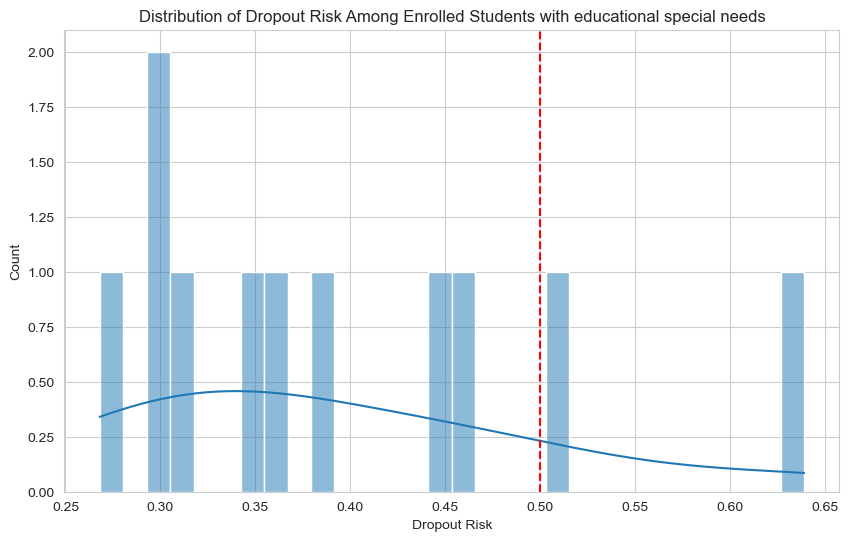


Selected Features by RFE:
Index(['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Gender', 'Scholarship holder',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')
Optimal number of features: 2
Selected features: [False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False False False False False False False]


In [ ]:
## Full special needs model - RandomForest
from sklearn.feature_selection import RFECV
X= special_needs_dropout_graduate.drop(columns=['Target'])
Y = special_needs_dropout_graduate['Target']
X_special_needs_enrolled = special_needs_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_special_needs_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_special_needs_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=special_needs_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students with educational special needs')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe = RFE(daytime_model, n_features_to_select=20)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)

selector = RFECV(daytime_model, cv=5)
selector = selector.fit(X, Y)

# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)

# Print the selected features
print("Selected features: %s" % selector.support_)

Accuracy: 0.5625


              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00        14
    Graduate       0.56      1.00      0.72        18

    accuracy                           0.56        32
   macro avg       0.28      0.50      0.36        32
weighted avg       0.32      0.56      0.40        32



[[ 0 14]
 [ 0 18]]

Top 10 most important features:
                   Feature  Importance
0                   Gender         1.0
1  Tuition fees up to date         0.0


/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

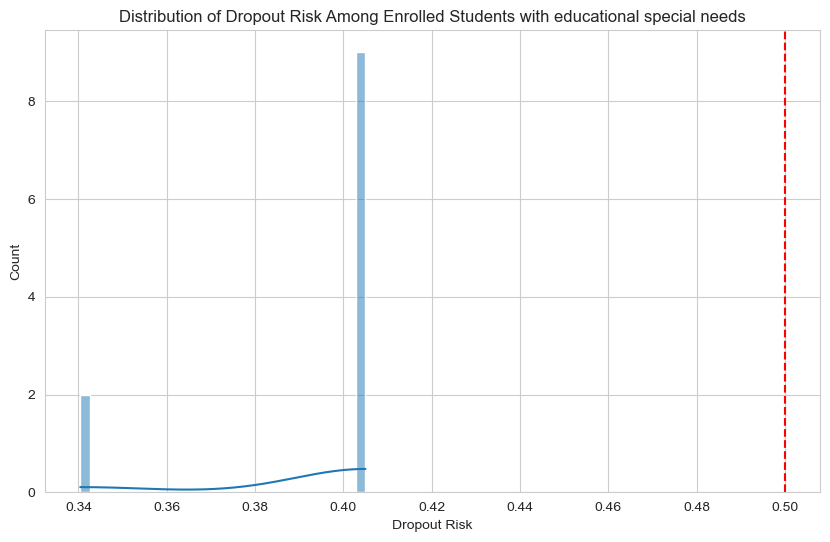

In [90]:
## Refined special needs model 1 - RandomForest
from sklearn.feature_selection import RFECV
X= special_needs_dropout_graduate[['Tuition fees up to date', 'Gender']]
Y = special_needs_dropout_graduate['Target']
X_special_needs_enrolled = special_needs_enrolled[['Tuition fees up to date', 'Gender']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_special_needs_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_special_needs_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=special_needs_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students with educational special needs')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

Accuracy: 0.78125


              precision    recall  f1-score   support

     Dropout       0.82      0.64      0.72        14
    Graduate       0.76      0.89      0.82        18

    accuracy                           0.78        32
   macro avg       0.79      0.77      0.77        32
weighted avg       0.79      0.78      0.78        32



[[ 9  5]
 [ 2 16]]

Top 10 most important features:
                                  Feature  Importance
0     Curricular units 2nd sem (approved)    0.168084
1        Curricular units 2nd sem (grade)    0.105482
2     Curricular units 1st sem (approved)    0.090069
3                         Admission grade    0.077308
4                      Mothers occupation    0.073103
5          Previous qualification (grade)    0.071520
6                                  Course    0.069386
7  Curricular units 1st sem (evaluations)    0.050526
8                       Application order    0.044725
9                   Mothers qualification    0.043343


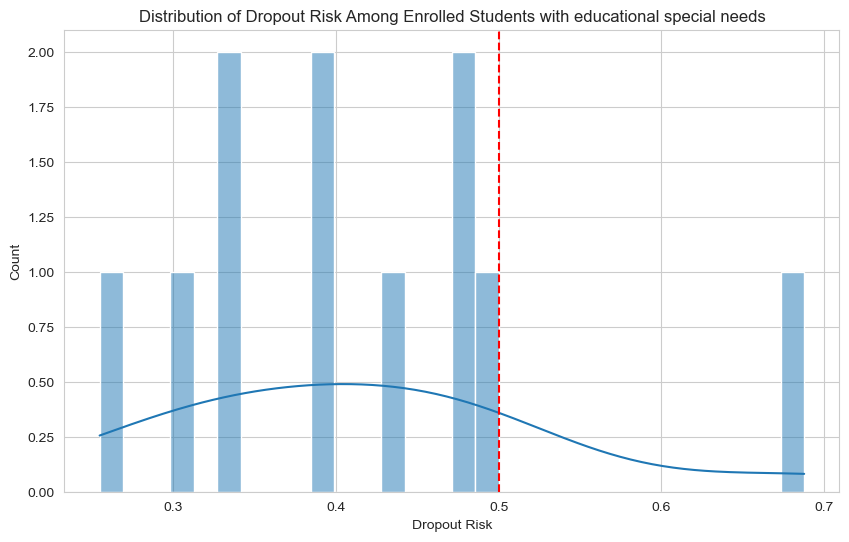

In [ ]:
## Refined special needs model 2 - RandomForest
from sklearn.feature_selection import RFECV
X= special_needs_dropout_graduate[['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Gender', 'Scholarship holder',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)']]
Y = special_needs_dropout_graduate['Target']
X_special_needs_enrolled = special_needs_enrolled[['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Gender', 'Scholarship holder',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=5000, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_special_needs_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_special_needs_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=special_needs_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students with educational special needs')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

Accuracy: 0.5625


              precision    recall  f1-score   support

     Dropout       0.50      0.79      0.61        14
    Graduate       0.70      0.39      0.50        18

    accuracy                           0.56        32
   macro avg       0.60      0.59      0.56        32
weighted avg       0.61      0.56      0.55        32



[[11  3]
 [11  7]]

Top 10 most important features:
                        Feature  Importance
0            Scholarship holder    0.168084
1             Age at enrollment    0.105482
2                        Debtor    0.090069
3         Fathers qualification    0.077308
4                   Nacionality    0.073103
5  Daytime/evening attendance\t    0.071520
6             Application order    0.069386
7     Educational special needs    0.050526
8              Application mode    0.044725
9        Previous qualification    0.043343


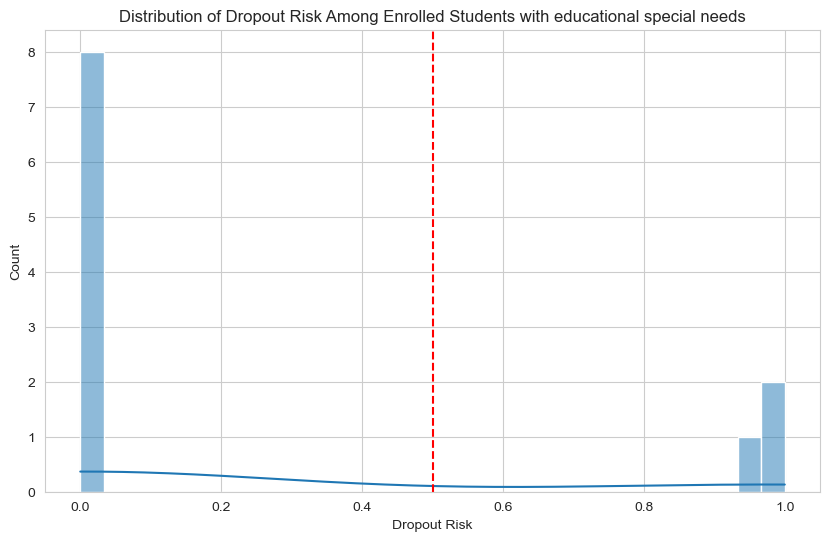


Selected Features by RFE:
Index(['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Gender', 'Scholarship holder',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')
Optimal number of features: 2
Selected features: [False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False False False False False False False]


In [ ]:
## Full special needs model - Logistic Regression 
from sklearn.feature_selection import RFECV
X= special_needs_dropout_graduate.drop(columns=['Target'])
Y = special_needs_dropout_graduate['Target']
X_special_needs_enrolled = special_needs_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
special_needs_model = LogisticRegression(solver='lbfgs', max_iter = 10000)

# Train the classifier
special_needs_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = special_needs_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred)) 
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = special_needs_model.predict_proba(X_special_needs_enrolled)[:, 0]  # Probability of dropout
grad_probs = special_needs_model.predict_proba(X_special_needs_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=special_needs_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students with educational special needs')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe = RFE(special_needs_model, n_features_to_select=20)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)

selector = RFECV(special_needs_model, cv=5)
selector = selector.fit(X, Y)

# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)

# Print the selected features
print("Selected features: %s" % selector.support_)

Accuracy: 0.5625


              precision    recall  f1-score   support

     Dropout       0.50      0.79      0.61        14
    Graduate       0.70      0.39      0.50        18

    accuracy                           0.56        32
   macro avg       0.60      0.59      0.56        32
weighted avg       0.61      0.56      0.55        32



[[11  3]
 [11  7]]

Top 10 most important features:
                        Feature  Importance
0            Scholarship holder    0.168084
1             Age at enrollment    0.105482
2                        Debtor    0.090069
3         Fathers qualification    0.077308
4                   Nacionality    0.073103
5  Daytime/evening attendance\t    0.071520
6             Application order    0.069386
7     Educational special needs    0.050526
8              Application mode    0.044725
9        Previous qualification    0.043343


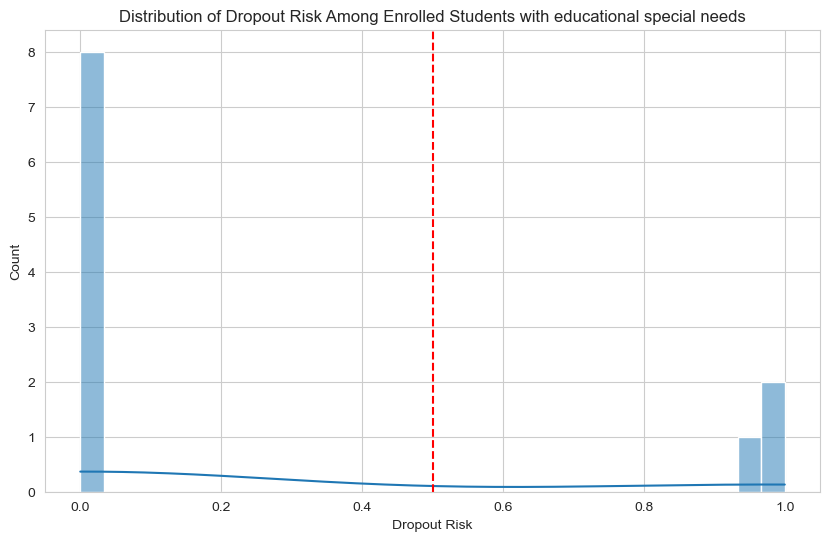

In [98]:
## Full special needs model - Logistic Regression 
from sklearn.feature_selection import RFECV
X_1 = special_needs_dropout_graduate[['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Gender', 'Scholarship holder',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)']]
Y_1 = special_needs_dropout_graduate['Target']
X_special_needs_enrolled = special_needs_enrolled[['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Gender', 'Scholarship holder',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.8, random_state=42)

# Create a random forest classifier
special_needs_model_1 = LogisticRegression(solver='lbfgs', max_iter = 10000)

# Train the classifier
special_needs_model_1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = special_needs_model_1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = special_needs_model_1.predict_proba(X_special_needs_enrolled)[:, 0]  # Probability of dropout
grad_probs = special_needs_model_1.predict_proba(X_special_needs_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=special_needs_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students with educational special needs')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

Accuracy: 0.9000696378830083


              precision    recall  f1-score   support

     Dropout       0.94      0.80      0.87      1151
    Graduate       0.88      0.96      0.92      1721

    accuracy                           0.90      2872
   macro avg       0.91      0.88      0.89      2872
weighted avg       0.90      0.90      0.90      2872



[[ 925  226]
 [  61 1660]]

Top 10 most important features:
                                  Feature  Importance
0     Curricular units 2nd sem (approved)    0.214011
1     Curricular units 1st sem (approved)    0.135400
2        Curricular units 2nd sem (grade)    0.108701
3        Curricular units 1st sem (grade)    0.072105
4                 Tuition fees up to date    0.053081
5  Curricular units 2nd sem (evaluations)    0.031897
6                         Admission grade    0.028855
7          Previous qualification (grade)    0.027246
8                       Age at enrollment    0.027229
9                                  Cours

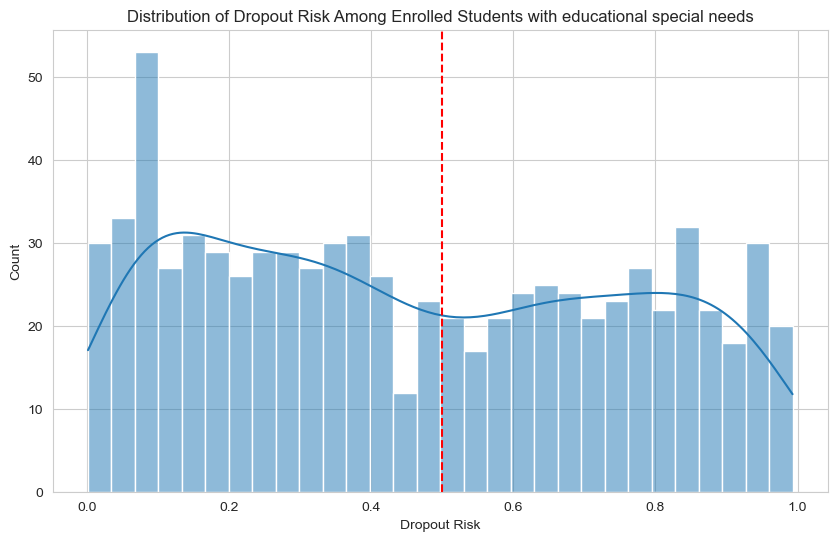


Selected Features by RFE:
Index(['Marital status', 'Application order', 'Nacionality', 'Displaced',
       'Debtor', 'Tuition fees up to date', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate'],
      dtype='object')
Optimal number of features: 33
Selected features: [ True  True  True False  True  True False  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [101]:
## Full special needs model - RandomForest
from sklearn.feature_selection import RFECV
X= no_special_needs_dropout_graduate.drop(columns=['Target'])
Y = no_special_needs_dropout_graduate['Target']
X_special_needs_enrolled = no_special_needs_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_special_needs_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_special_needs_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=no_special_needs_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students with educational special needs')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe = RFE(daytime_model, n_features_to_select=20)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)

selector = RFECV(daytime_model, cv=5)
selector = selector.fit(X, Y)

# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)

# Print the selected features
print("Selected features: %s" % selector.support_)